# Will it be an early Spring?

On February 2<sup>nd</sup> every year Punxsutawney Phil makes a prediction about if there will be an early Spring or if Winter will continue for 6 more weeks (till about mid-March). He is however not very accurate (well, according to [The Inner Circle](https://www.groundhog.org/inner-circle) he is 100% correct but the human handler may not interpret his response correctly). The overall goal is to be able to predict if it will be an early Spring.

For this project you must go through most steps in the checklist. You must write responses for all items however sometimes the item will simply be "does not apply". Some of the parts are a bit more nebulous and you simply show that you have done things in general (and the order doesn't really matter). Keep your progress and thoughts organized in this document and use formatting as appropriate (using markdown to add headers and sub-headers for each major part). Do not do the final part (launching the product) and your presentation will be done as information written in this document in a dedicated section, no slides or anything like that. It should however include the best summary plots/graphics/data points.

You are intentionally given very little information thus far. You must communicate with your client (me) for additional information as necessary. But also make sure that your communications are efficient, thought out, and not redundant as your client might get frustrated and "fire" you (this only applies to getting information from your client, this does not necessary apply to asking for help with the actual project itself - you should continuously ask questions for getting help).

You must submit all data files and a pickled final model along with this notebook.

The group with the best results on the 10% of the data that I kept for myself will earn +5 extra credit (if multiple groups are close points may be given to multiple groups).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, StandardScaler, MinMaxScaler

from sklearn.model_selection import GridSearchCV

from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score

from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.preprocessing import OneHotEncoder

from sklearn.impute import SimpleImputer

from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score

from sklearn.metrics import classification_report

from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.preprocessing import OneHotEncoder

from sklearn.impute import SimpleImputer

from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score

from sklearn.impute import KNNImputer

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.svm import OneClassSVM

from sklearn.metrics import accuracy_score, f1_score 

Frame the Problem and Look at the Big Picture
========================

1. **Define the objective in business terms.** <mark>The objective is to predict whether there will be an early Spring, allowing farmers to decide whether to purchase a new kind of corn seed that can grow two crops. Early Spring is defined as a period when the average temperature is above 40°F, the minimum temperature is above 32°F, and the average soil temperature is above 50°F before April 1st, with no snow on the ground.</mark>
2. **How will your solution be used?** <mark>The solution will be used by farmers in western PA to make informed decisions about purchasing seeds by February 25th. The prediction will help them determine if conditions will be favorable for planting the new corn seed early.</mark>
3. **What are the current solutions/workarounds (if any)?** <mark>Currently, farmers rely on Punxsutawney Phil's prediction, which is not very accurate. They may also use historical weather data and personal experience to make decisions.</mark>
4. **How should you frame this problem (supervised/unsupervised, online/offline, …)?** <mark>This problem should be framed as a supervised learning problem, where the goal is to predict a binary outcome (early Spring or not) based on historical weather and soil data. This will be a classification model, using offline learning since the most important data involves winter and spring only.</mark>
5. **How should performance be measured? Is the performance measure aligned with the business objective?** <mark>Performance should be measured using accuracy, precision, recall, and F1-score. Since the preference is to avoid false negatives (missing an early Spring), recall might be particularly important.</mark>
6. **What would be the minimum performance needed to reach the business objective?** <mark>The minimum performance needed would be a recall rate that ensures farmers can confidently make purchasing decisions with minimal risk of missing an early Spring.</mark>
7. **What are comparable problems? Can you reuse experience or tools?** <mark>We can use tools from the MNIST in-class notebook to help with this model, especially with working with binary classifiers and a classification model. </mark>
8. **Is human expertise available?** <mark>Yes, human expertise is available from the farmers who have historical data and experience with weather patterns and planting conditions.</mark>
9. **How would you solve the problem manually?** <mark>I would solve this manually by focusing on the weather conditions, soil conditions, temperature of both weather and soil, whether or not there is snow cosverage within the land in Western PA. </mark>
10. **List the assumptions you (or others) have made so far. Verify assumptions if possible.** <mark>TODO</mark>

Get the Data
=======================================================================

1. **List the data you need and how much you need.** <mark>We need data to predict either an early spring, or late winter. To do that we need weather, soil, and a dataset which gives us a label feature like early spring. Also could use El Nino or La Nina data to predict this.</mark>
2. **Find and document where you can get that data:** <mark>From the client for first 3 datasets. From https://www.cpc.ncep.noaa.gov/products/analysis_monitoring/ensostuff/ONI_v5.php for El Nino and La Nina data</mark>
3. **Get access authorizations:** <mark>Done</mark>
4. **Create a workspace (with enough storage space)**: This notebook.
5. **Get the data:** <mark>Got the data.</mark>
6. **Convert the data to a format you can easily manipulate (without changing the data itself):** Done, it's a CSV.
7. **Ensure sensitive information is deleted or protected (e.g. anonymized):** Done.
8. **Check the size and type of data (time series, geographical, …):** <mark>TODO</mark> - complete in the cells below
9. **Sample a test set, put it aside, and never look at it (no data snooping!):** <mark>TODO</mark> - complete in the cells below

In [2]:
def load_and_concat_datasets(weather_file, soil_file, output_file='data.csv'):
    # Convert the 'date' in weather and 'day' in soil to datetime for proper merging
    weather_file['date'] = pd.to_datetime(weather_file['date'])
    soil_file['day'] = pd.to_datetime(soil_file['day'])

    # Merge the weather and soil data on 'date' and 'day'
    combined_df = pd.merge(weather_file, soil_file, left_on='date', right_on='day', how='inner')

    # Display the first few rows of the final combined DataFrame
    print(combined_df.head())

    # Save the final combined DataFrame to a CSV file
    combined_df.to_csv(output_file, index=False)

    return combined_df





def read_weather_data(filename):
    """
    Reads weather data from the given file. M values are assumed to be
    missing values (returned as nan). T values are trace values and returned as
    0.0025 inches for precipitation and snowfall and 0.025 inches for snowdepth
    (see https://www.chicagotribune.com/news/weather/ct-wea-asktom-0415-20180413-column.html).
    All temperatures are in Fahrenheit and all precipitation values are in inches.
    """
    def convert_precipitation(raw):
        return 0.0025 if raw == 'T' else np.nan if raw == 'M' else pd.to_numeric(raw)
    def convert_depth(raw):
        return 0.025 if raw == 'T' else np.nan if raw == 'M' else pd.to_numeric(raw)
    return pd.read_csv(filename, na_values=['M'], parse_dates=[0],
        converters={
            "precipitation":convert_precipitation,
            "snowfall":convert_precipitation,
            "snowdepth":convert_depth,
        },
        names=["date","max_temp","min_temp","avg_temp","precipitation","snowfall","snowdepth"],
        header=0)

def read_soil_data(filename):
    """
    Reads soil data from the given file.
    All temperatures are in Celsius and all moisture values are in wfv (m^3/m^3).
    """
    return pd.read_csv(filename, parse_dates=[0])



#function to stratify all precipitation columns. low med high amounts of precipitation
def stratify_precipitation(data):
    """
    Stratifies precipitation columns into low, medium, and high categories based on percentiles.

    Parameters:
    data (pd.DataFrame): DataFrame containing precipitation columns.

    Returns:
    pd.DataFrame: DataFrame with stratified precipitation categories added.
    """
    
    # Create a copy of the DataFrame to avoid modifying the original
    stratified_data = data.copy()

    # Iterate over precipitation columns and apply stratification
    for column in data.columns:
        if 'precipitation' in column:
            # Calculate thresholds using percentiles
            low_threshold = data[column].quantile(0.33)
            high_threshold = data[column].quantile(0.66)
            
            # Create new column for stratified categories
            stratified_data[f'{column}_category'] = pd.cut(
                stratified_data[column],
                bins=[-float('inf'), low_threshold, high_threshold, float('inf')],
                labels=['Low', 'Medium', 'High']
            )
    
    return stratified_data


#function to stratify all snowfall columns. low med high amounts of snowfall
def stratify_snowfall(data):
    """
    Stratifies snowfall columns into low, medium, and high categories based on percentiles.

    Parameters:
    data (pd.DataFrame): DataFrame containing snowfall columns.

    Returns:
    pd.DataFrame: DataFrame with stratified snowfall categories added.
    """
    
    # Create a copy of the DataFrame to avoid modifying the original
    stratified_data = data.copy()

    # Iterate over snowfall columns and apply stratification
    for column in data.columns:
        if 'snowfall' in column:
            # Calculate thresholds using percentiles
            low_threshold = data[column].quantile(0.33)
            high_threshold = data[column].quantile(0.66)
            
            # Create new column for stratified categories
            stratified_data[f'{column}_category'] = pd.cut(
                stratified_data[column],
                bins=[-float('inf'), low_threshold, high_threshold, float('inf')],
                labels=['Low', 'Medium', 'High']
            )
    
    return stratified_data


#function to stratify all snowdepth columns. low med high amounts of snowdepth
def stratify_snowdepth(data):
    """
    Stratifies snowdepth columns into low, medium, and high categories based on percentiles.

    Parameters:
    data (pd.DataFrame): DataFrame containing snowdepth columns.

    Returns:
    pd.DataFrame: DataFrame with stratified snowdepth categories added.
    """
    
    # Create a copy of the DataFrame to avoid modifying the original
    stratified_data = data.copy()

    # Iterate over snowdepth columns and apply stratification
    for column in data.columns:
        if 'snowdepth' in column:
            # Calculate thresholds using percentiles
            low_threshold = data[column].quantile(0.33)
            high_threshold = data[column].quantile(0.66)
            
            # Create new column for stratified categories
            stratified_data[f'{column}_category'] = pd.cut(
                stratified_data[column],
                bins=[-float('inf'), low_threshold, high_threshold, float('inf')],
                labels=['Low', 'Medium', 'High']
            )
    
    return stratified_data


def impute_mean_values(data):
    """
    Imputes the mean for NaN values in specified columns.

    Parameters:
    data (pd.DataFrame): DataFrame containing precipitation, snowfall, and snowdepth columns.

    Returns:
    pd.DataFrame: DataFrame with NaN values replaced by mean in specified columns.
    """
    # List of columns to impute for precipitation, snowfall, and snowdepth
    precipitation_cols = [f'precipitation_{i}' for i in range(1, 57)]
    snowfall_cols = [f'snowfall_{i}' for i in range(1, 57)]
    snowdepth_cols = [f'snowdepth_{i}' for i in range(1, 57)]

    # Combine all columns into a single list
    all_columns = precipitation_cols + snowfall_cols + snowdepth_cols

    # Impute mean values for each specified column
    for column in all_columns:
        if column in data.columns:
            data[column].fillna(data[column].mean(), inplace=True)

    return data


In [3]:
# read csv file
soilData = read_soil_data('soil.csv')
weatherData = read_weather_data('weather.csv')
earlySpring = pd.read_csv('early_spring.csv')

data = load_and_concat_datasets(weatherData, soilData, 'data.csv')

        date  max_temp  min_temp  avg_temp  precipitation  snowfall  \
0 1947-01-01      30.0      24.0      27.0           0.12       0.5   
1 1947-01-02      44.0      29.0      36.5           0.49       0.0   
2 1947-01-03      54.0      41.0      47.5           0.04       0.0   
3 1947-01-04      42.0      24.0      33.0           0.00       0.0   
4 1947-01-05      33.0      25.0      29.0           0.00       0.0   

   snowdepth        day  mean_soil_temp  mean_soil_moisture  min_soil_temp  \
0        1.0 1947-01-01       -3.220000            0.477200           -4.1   
1        0.0 1947-01-02       -2.533333            0.498333           -3.2   
2        NaN 1947-01-03       -1.733333            0.515000           -2.7   
3        NaN 1947-01-04        0.729167            0.496625           -0.1   
4        NaN 1947-01-05        0.162500            0.485792           -0.7   

   min_soil_moisture  max_soil_temp  max_soil_moisture  
0              0.475           -1.4            

In [4]:
# Generate a date range for each year from 1947 to 2024, limited to Jan 1 to Feb 25
date_range = pd.date_range(start='1947-01-01', end='2024-02-25', freq='D')

# Filter to keep only dates from January 1 to February 25 of each year
date_range_filtered = date_range[(date_range.month == 1) | ((date_range.month == 2) & (date_range.day <= 25))]

# Remove values from data that are not in date range
data = data[data['date'].isin(date_range_filtered)]

# Filter the date range to only include January and February (Jan 1 to Feb 25)
january_february_range = date_range_filtered

# Find any missing dates in the 'date' column
missing_dates = january_february_range[~january_february_range.isin(data['date'])]

# Display the missing dates
missing_dates

DatetimeIndex(['1958-01-01', '1958-01-02', '1958-01-03', '1958-01-04',
               '1958-01-05', '1958-01-06', '1958-01-07', '1958-01-08',
               '1958-01-09', '1958-01-10',
               ...
               '2019-02-16', '2019-02-17', '2019-02-18', '2019-02-19',
               '2019-02-20', '2019-02-21', '2019-02-22', '2019-02-23',
               '2019-02-24', '2019-02-25'],
              dtype='datetime64[ns]', length=448, freq=None)

In [5]:
# Create a DataFrame for the missing dates
missing_dates_df = pd.DataFrame({'date': missing_dates})

# Combine the original data with the missing dates
combined_data = pd.concat([data, missing_dates_df])

#Sort the combined data by date
data = combined_data.sort_values(by='date').reset_index(drop=True)


In [6]:
#show every column
pd.set_option('display.max_columns', None)
dat = data.copy()
dat['year'] = dat.date.dt.year
dat['day_of_year'] = dat.date.dt.dayofyear
dat = dat.drop(columns=['date']).pivot(index='year', columns='day_of_year')
dat.columns = ["_".join([str(x) for x in a]) for a in dat.columns.to_flat_index()]

In [7]:
#set index of earlySpring to year
earlySpring = earlySpring.sort_values(by='year').reset_index(drop=True)

# Create a DataFrame with all years from the minimum to the maximum year
all_years = pd.DataFrame({'year': range(earlySpring['year'].min(), earlySpring['year'].max() + 1)})

# Merge with the original DataFrame
merged_earlySpring = pd.merge(all_years, earlySpring, on='year', how='left')

# Fill NaN for early_spring where data is not available
merged_earlySpring['early_spring'] = merged_earlySpring['early_spring'].fillna(np.nan)



In [8]:
earlySpring = merged_earlySpring.set_index('year')

In [9]:
data = dat.join(earlySpring, how='inner')

In [10]:
# read ExtraDataONI.csv
oni_data = pd.read_csv('ExtraDataONI.csv')

oni_data = oni_data.set_index('year')
oni_data
# merge data with oni_data
data = data.join(oni_data, how='inner')

In [11]:
# If there are categorical columns, list their unique values and counts
for col in data.select_dtypes(include=['object']).columns:
    print(f"Unique values for {col}:")
    print(data[col].value_counts())

Unique values for early_spring:
early_spring
False    35
True     35
Name: count, dtype: int64


In [12]:
data

max_temp_1  max_temp_2  max_temp_3  max_temp_4  max_temp_5  max_temp_6  \
year                                                                           
1947        30.0        44.0        54.0        42.0        33.0        33.0   
1948        46.0        41.0        32.0        34.0        34.0        32.0   
1949        31.0        34.0        40.0        43.0        55.0        54.0   
1950        49.0        53.0        61.0        69.0        54.0        53.0   
1951        40.0        46.0        52.0        50.0        41.0        46.0   
...          ...         ...         ...         ...         ...         ...   
2020        39.0        37.0        49.0        50.0        47.0        37.0   
2021        33.0        49.0        50.0        40.0        35.0        34.0   
2022        56.0        53.0        45.0        29.0        39.0        48.0   
2023        53.0        50.0        48.0        59.0        57.0        37.0   
2024        37.0        32.0        32.0        38.0        32.0        35.0   

      max_temp_7  max_temp_8  max_temp_9  max_temp_10  max_temp_11  \
year                                                                 
1947        34.0        35.0        31.0         30.0         49.0   
1948        32.0        41.0        49.0         33.0         30.0   
1949        49.0        56.0        61.0         53.0         45.0   
1950        43.0        30.0        48.0         59.0         55.0   
1951        36.0        23.0        30.0         46.0         40.0   
...          ...         ...         ...          ...          ...   
2020        41.0        34.0        33.0         39.0         53.0   
2021        35.0        35.0        32.0         34.0         37.0   
2022        26.0        19.0        34.0         42.0         23.0   
2023        34.0        33.0        39.0         35.0         40.0   
2024        34.0        34.0        36.0         45.0         42.0   

      max_temp_12  max_temp_13  max_temp_14  max_temp_15  max_temp_16  \
year                                                                    
1947         47.0         40.0         50.0         50.0         51.0   
1948         36.0         35.0         29.0         21.0         36.0   
1949         36.0         36.0         35.0         44.0         60.0   
1950         37.0         63.0         64.0         48.0         54.0   
1951         32.0         36.0         39.0         46.0         30.0   
...           ...          ...          ...          ...          ...   
2020         69.0         53.0         50.0         54.0         55.0   
2021         39.0         35.0         42.0         47.0         47.0   
2022         30.0         44.0         44.0         33.0         21.0   
2023         45.0         40.0         36.0         25.0         30.0   
2024         49.0         41.0         38.0         26.0         21.0   

      max_temp_17  max_temp_18  max_temp_19  max_temp_20  max_temp_21  \
year                                                                    
1947         49.0         42.0         44.0         54.0         46.0   
1948         28.0         16.0         27.0         40.0         39.0   
1949         59.0         45.0         60.0         36.0         38.0   
1950         43.0         50.0         28.0         26.0         40.0   
1951         49.0         56.0         60.0         66.0         58.0   
...           ...          ...          ...          ...          ...   
2020         38.0         28.0         47.0         28.0         26.0   
2021         32.0         35.0         31.0         37.0         39.0   
2022         31.0         31.0         29.0         44.0         25.0   
2023         47.0         48.0         39.0         48.0         36.0   
2024         17.0         18.0         29.0         25.0         16.0   

      max_temp_22  max_temp_23  max_temp_24  max_temp_25  max_temp_26  \
year                                                                    
1947    

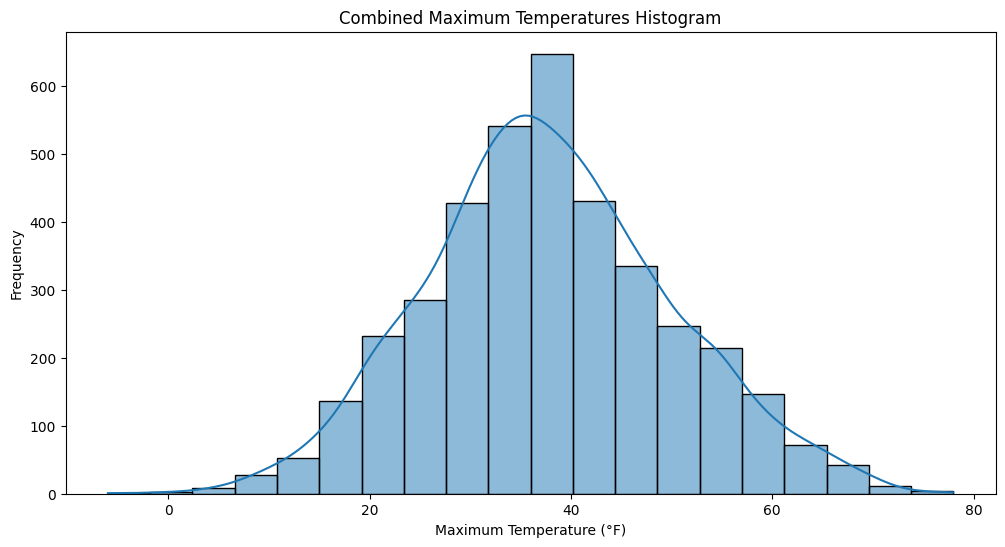

In [13]:
max_temp_values = pd.melt(data, value_vars=[col for col in data if 'max_temp' in col], 
                           var_name='Temperature_Type', value_name='Max_Temperature')

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(max_temp_values['Max_Temperature'], bins=20, kde=True)

# Add labels and title
plt.title('Combined Maximum Temperatures Histogram')
plt.xlabel('Maximum Temperature (°F)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

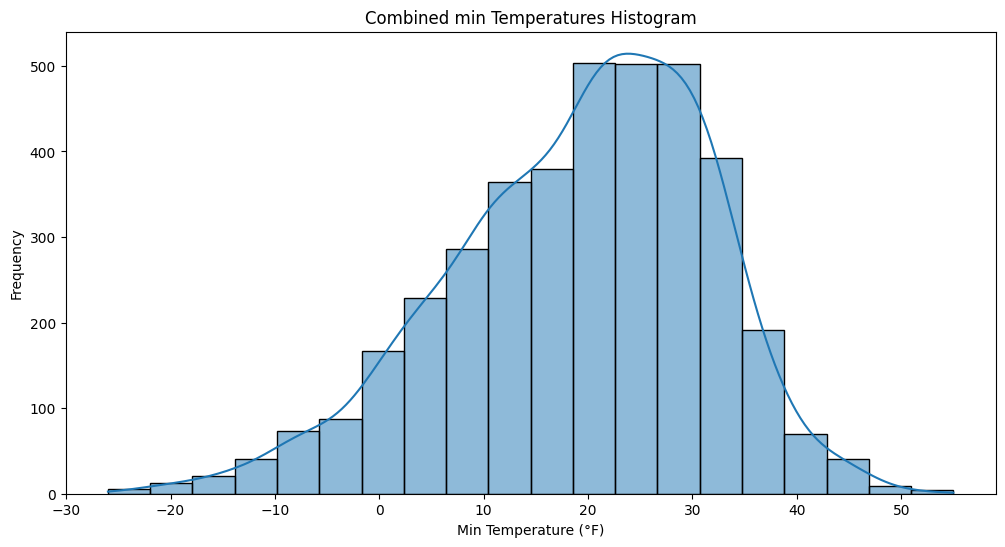

In [14]:
min_temp_values = pd.melt(data, value_vars=[col for col in data if 'min_temp' in col], 
                           var_name='Temperature_Type', value_name='Min_Temperature')

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(min_temp_values['Min_Temperature'], bins=20, kde=True)

# Add labels and title
plt.title('Combined min Temperatures Histogram')
plt.xlabel('Min Temperature (°F)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

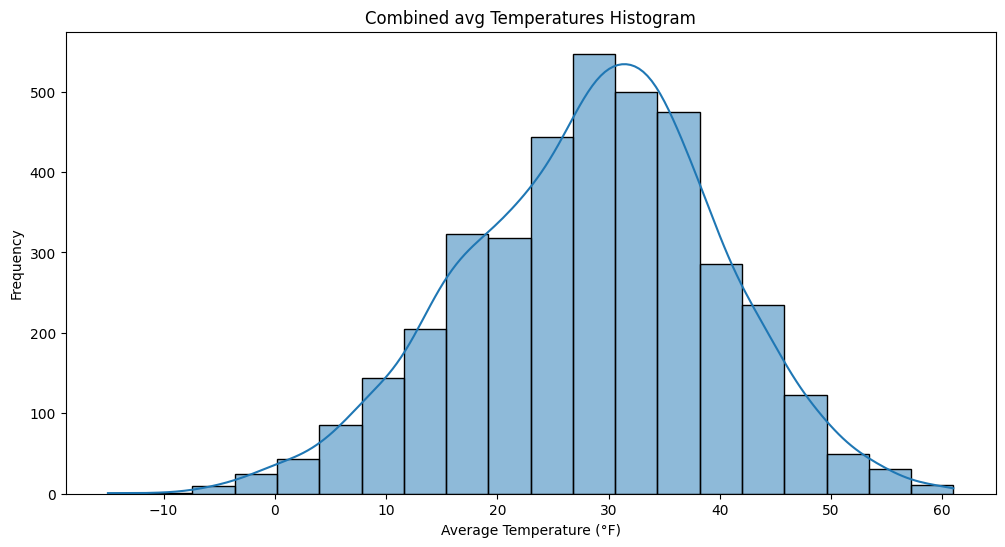

In [15]:
avg_temp_values = pd.melt(data, value_vars=[col for col in data if 'avg_temp' in col], 
                           var_name='Temperature_Type', value_name='Avg_Temperature')

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(avg_temp_values['Avg_Temperature'], bins=20, kde=True)

# Add labels and title
plt.title('Combined avg Temperatures Histogram')
plt.xlabel('Average Temperature (°F)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

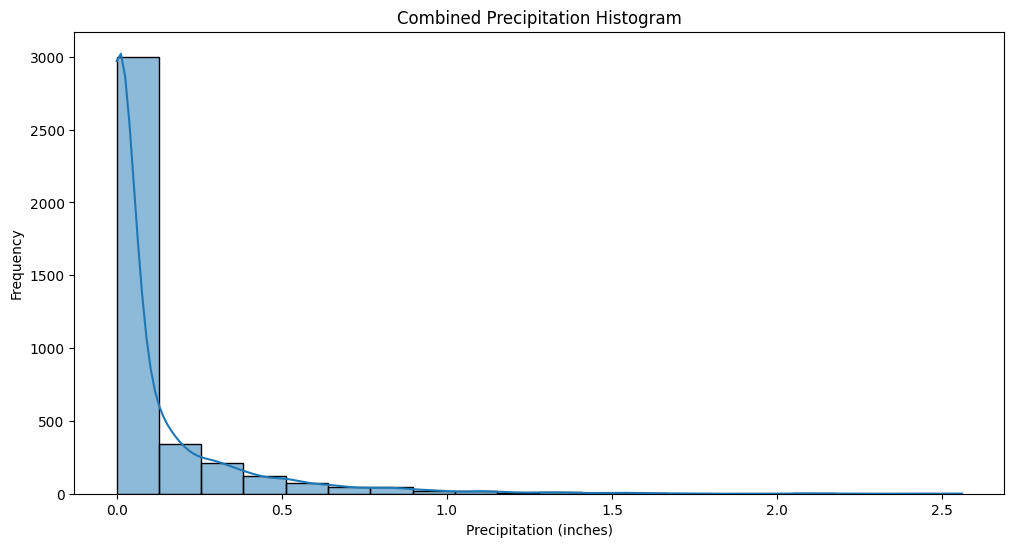

In [16]:
precipitation_values = pd.melt(data, value_vars=[col for col in data if 'precipitation' in col],
                                 var_name='Precipitation_Type', value_name='Precipitation')

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(precipitation_values['Precipitation'], bins=20, kde=True)

# Add labels and title
plt.title('Combined Precipitation Histogram')
plt.xlabel('Precipitation (inches)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

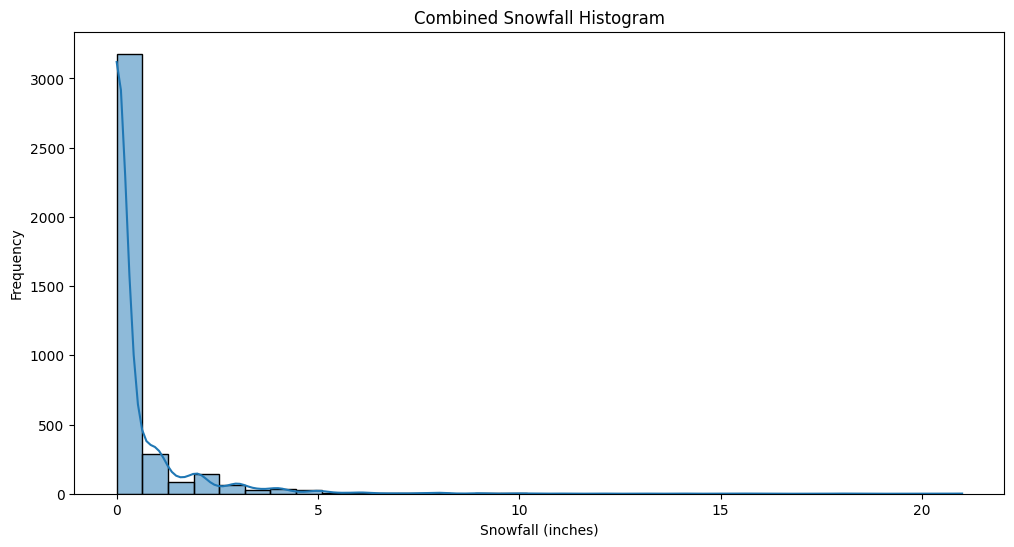

In [17]:
snowfall_values = pd.melt(data, value_vars=[col for col in data if 'snowfall' in col],
                                    var_name='Snowfall_Type', value_name='Snowfall')

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(snowfall_values['Snowfall'], bins=33, kde=True)

# Add labels and title
plt.title('Combined Snowfall Histogram')
plt.xlabel('Snowfall (inches)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

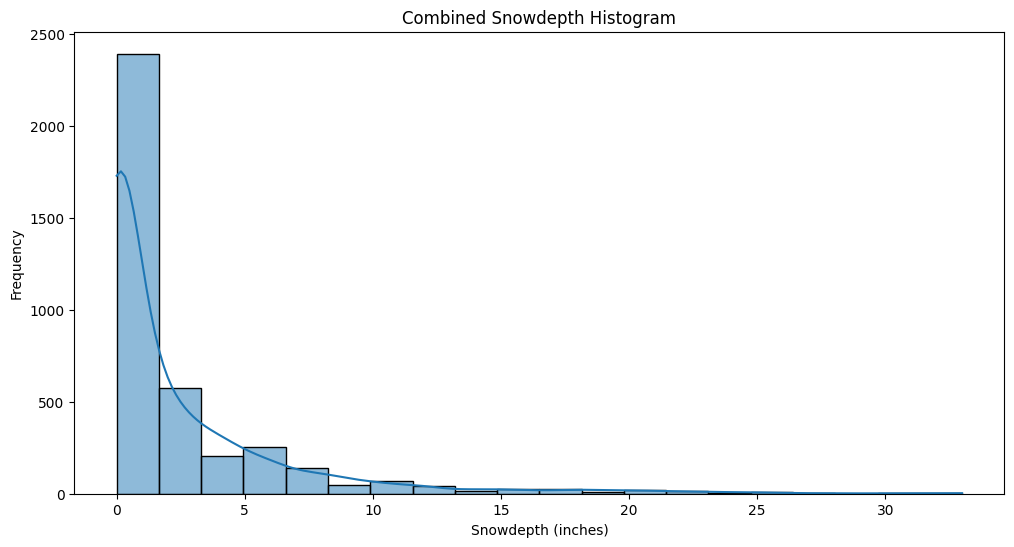

In [18]:
snowdepth_values = pd.melt(data, value_vars=[col for col in data if 'snowdepth' in col],
                                    var_name='Snowdepth_Type', value_name='Snowdepth')

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(snowdepth_values['Snowdepth'], bins=20, kde=True)

# Add labels and title
plt.title('Combined Snowdepth Histogram')
plt.xlabel('Snowdepth (inches)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

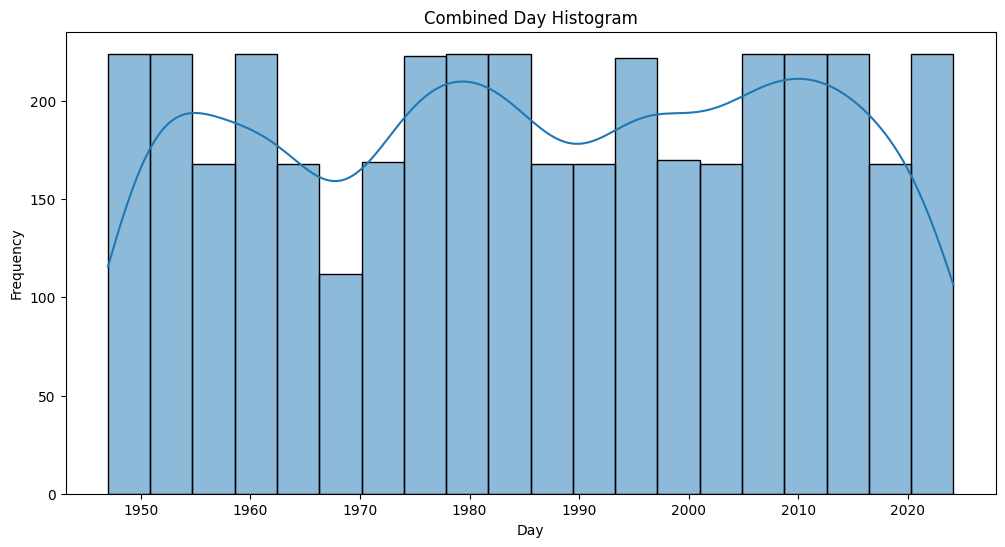

In [19]:
day_values = pd.melt(data, value_vars=[col for col in data if 'day' in col],
                                    var_name='Day_Type', value_name='Day')

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(day_values['Day'], bins=20, kde=True)

# Add labels and title
plt.title('Combined Day Histogram')
plt.xlabel('Day')
plt.ylabel('Frequency')

# Show the plot
plt.show()

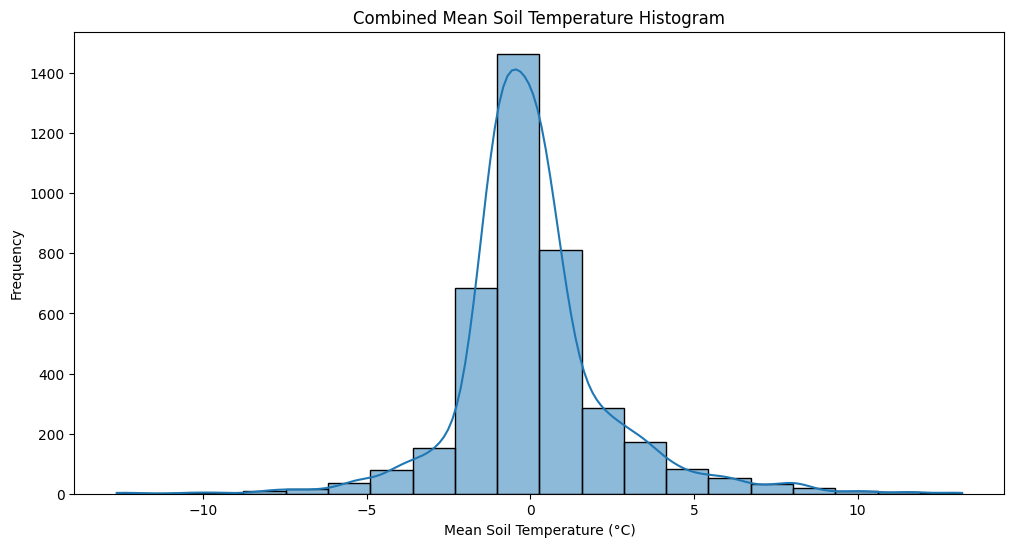

In [20]:
mean_soil_temp_values = pd.melt(data, value_vars=[col for col in data if 'mean_soil_temp' in col],
                                    var_name='Mean_Soil_Temperature_Type', value_name='Mean_Soil_Temperature')

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(mean_soil_temp_values['Mean_Soil_Temperature'], bins=20, kde=True)

# Add labels and title
plt.title('Combined Mean Soil Temperature Histogram')
plt.xlabel('Mean Soil Temperature (°C)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

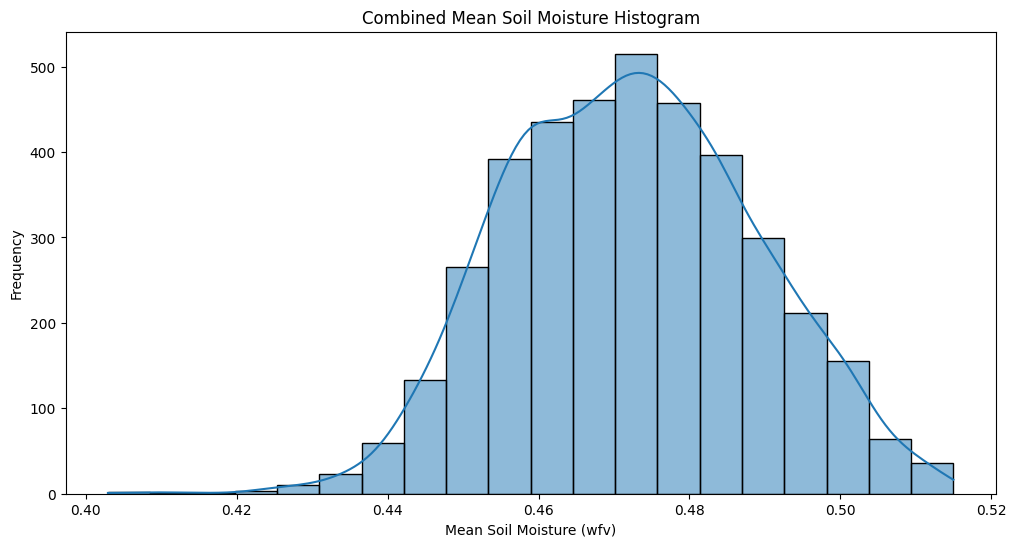

In [21]:
mean_soil_moisture_values = pd.melt(data, value_vars=[col for col in data if 'mean_soil_moisture' in col],
                                    var_name='Mean_Soil_Moisture_Type', value_name='Mean_Soil_Moisture')

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(mean_soil_moisture_values['Mean_Soil_Moisture'], bins=20, kde=True)

# Add labels and title
plt.title('Combined Mean Soil Moisture Histogram')
plt.xlabel('Mean Soil Moisture (wfv)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

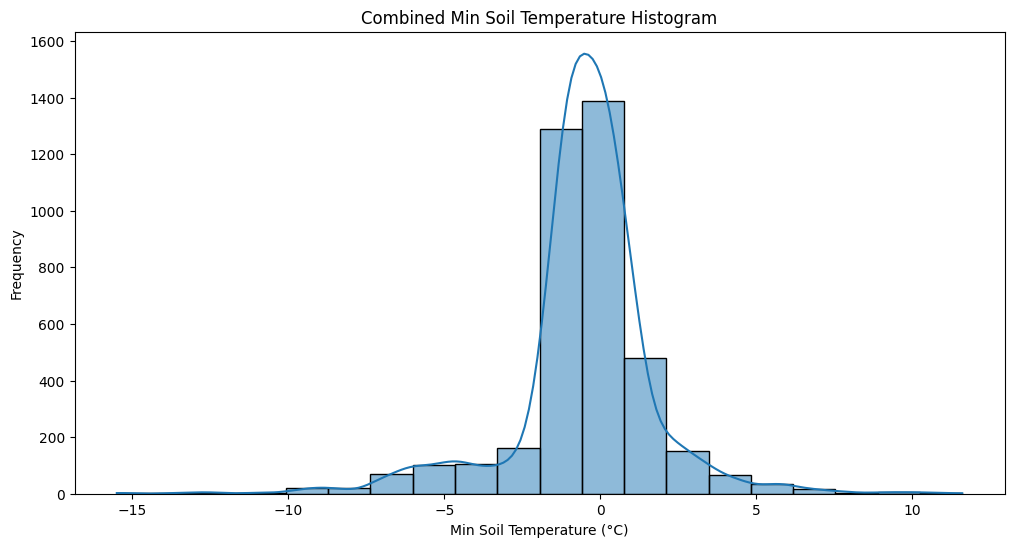

In [22]:
min_soil_temp_values = pd.melt(data, value_vars=[col for col in data if 'min_soil_temp' in col],
                                    var_name='Min_Soil_Temperature_Type', value_name='Min_Soil_Temperature')

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(min_soil_temp_values['Min_Soil_Temperature'], bins=20, kde=True)

# Add labels and title
plt.title('Combined Min Soil Temperature Histogram')
plt.xlabel('Min Soil Temperature (°C)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

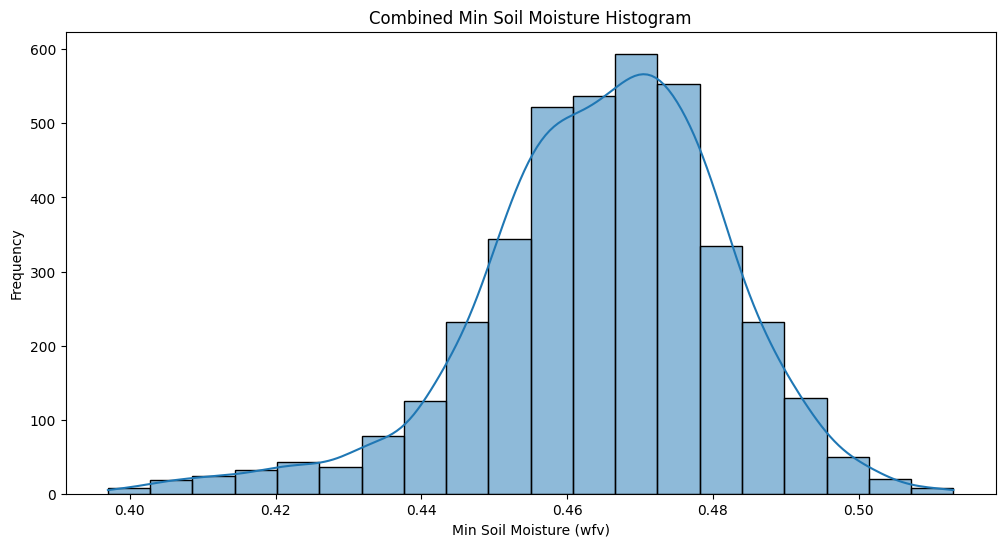

In [23]:
min_soil_moisture_values = pd.melt(data, value_vars=[col for col in data if 'min_soil_moisture' in col],
                                    var_name='Min_Soil_Moisture_Type', value_name='Min_Soil_Moisture')

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(min_soil_moisture_values['Min_Soil_Moisture'], bins=20, kde=True)

# Add labels and title
plt.title('Combined Min Soil Moisture Histogram')
plt.xlabel('Min Soil Moisture (wfv)')
plt.ylabel('Frequency')

# Show the plot
plt.show()


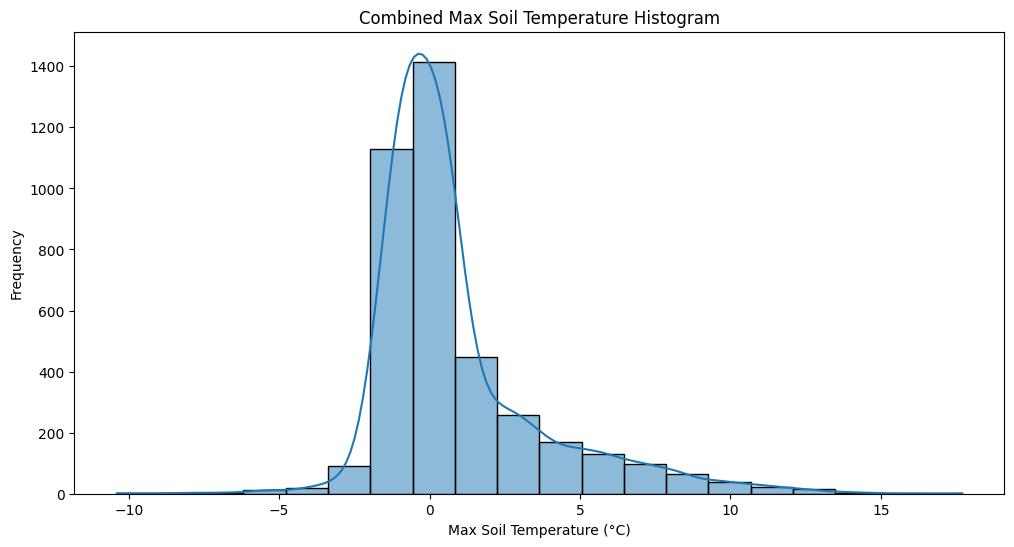

In [24]:
max_soil_temp_values = pd.melt(data, value_vars=[col for col in data if 'max_soil_temp' in col],
                                    var_name='Max_Soil_Temperature_Type', value_name='Max_Soil_Temperature')

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(max_soil_temp_values['Max_Soil_Temperature'], bins=20, kde=True)

# Add labels and title
plt.title('Combined Max Soil Temperature Histogram')
plt.xlabel('Max Soil Temperature (°C)')
plt.ylabel('Frequency')

# Show the plot
plt.show()


### Splitting Data

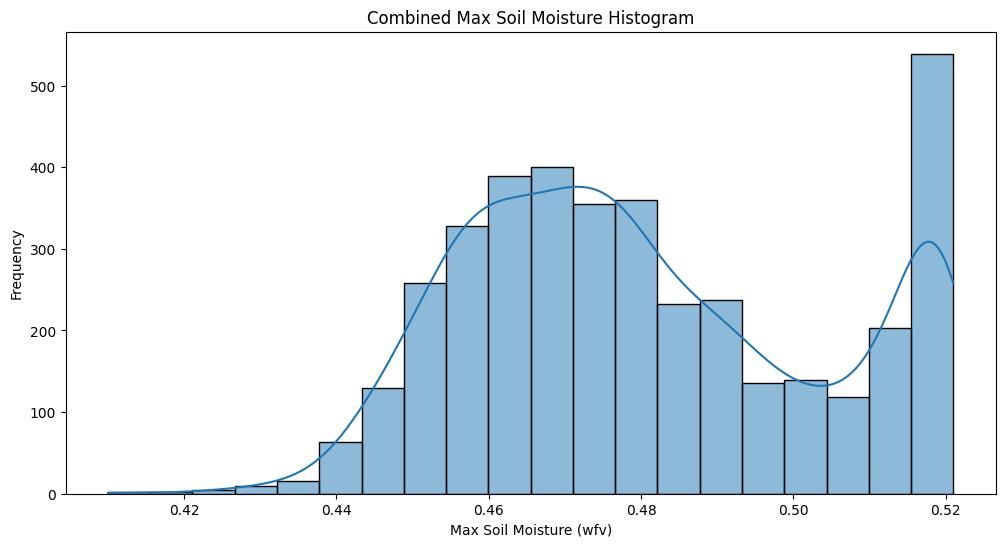

In [25]:
max_soil_moisture_values = pd.melt(data, value_vars=[col for col in data if 'max_soil_moisture' in col],
                                    var_name='Max_Soil_Moisture_Type', value_name='Max_Soil_Moisture')

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(max_soil_moisture_values['Max_Soil_Moisture'], bins=20, kde=True)

# Add labels and title
plt.title('Combined Max Soil Moisture Histogram')
plt.xlabel('Max Soil Moisture (wfv)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

<Axes: xlabel='DJF', ylabel='Count'>

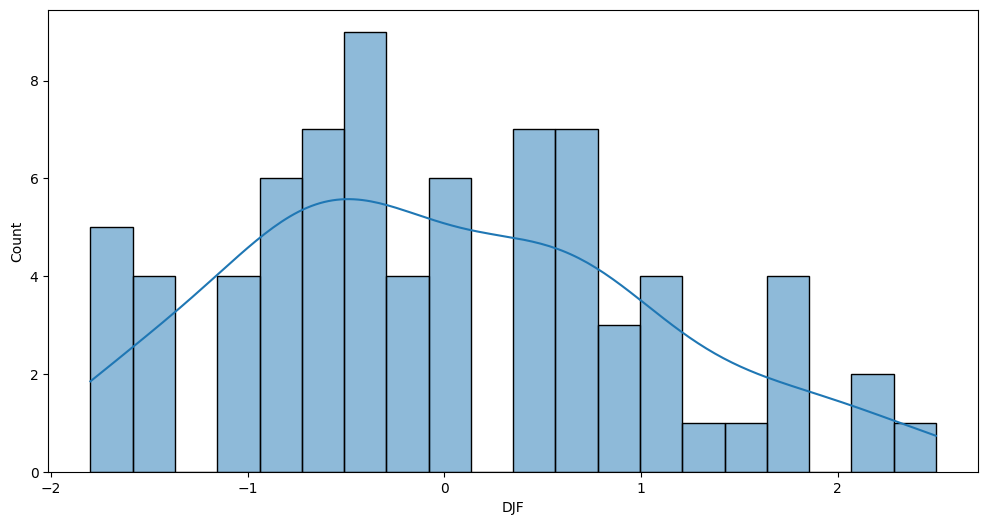

In [26]:
#plot DJF variable in data

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(data['DJF'], bins=20, kde=True)

<Axes: xlabel='JFM', ylabel='Count'>

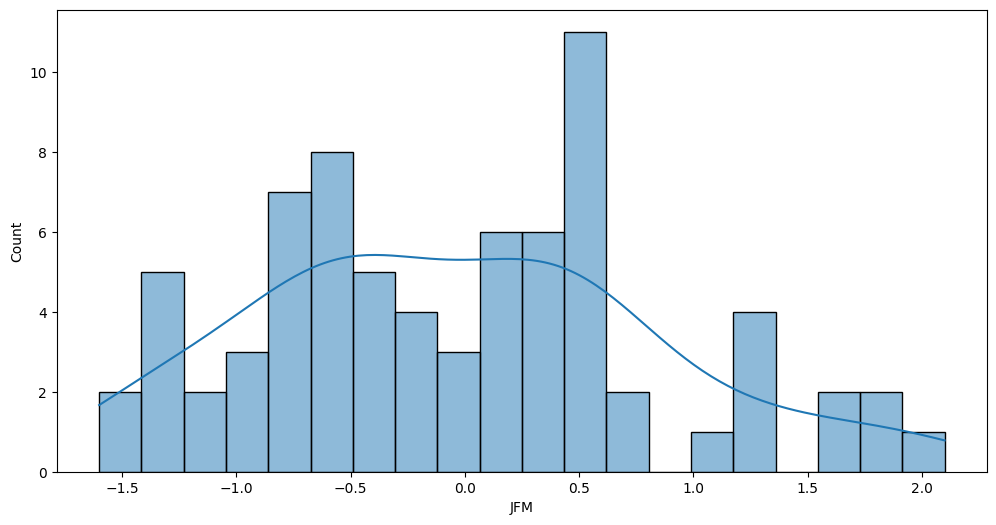

In [27]:
#plot JFM
plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(data['JFM'], bins=20, kde=True)

<Axes: xlabel='FMA', ylabel='Count'>

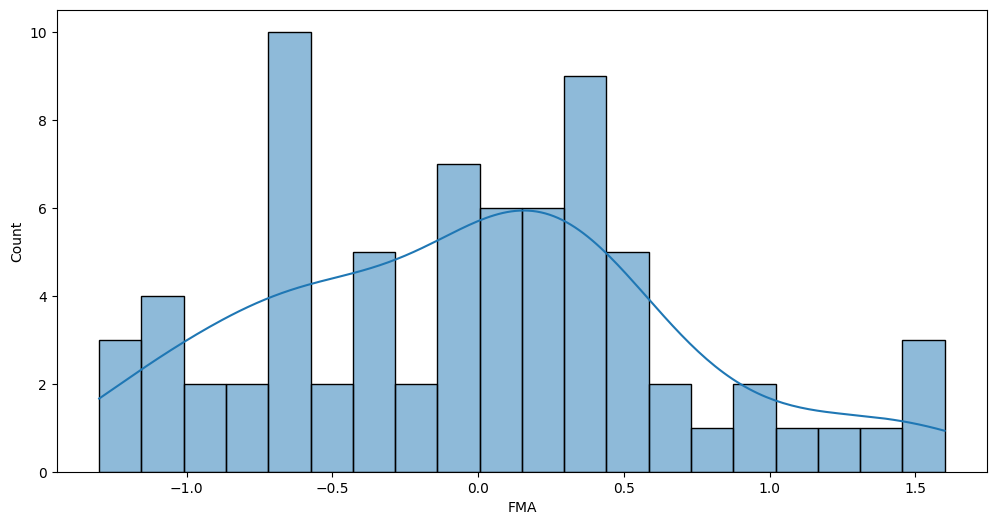

In [28]:
#plot FMA

plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(data['FMA'], bins=20, kde=True)

<Axes: xlabel='MAM', ylabel='Count'>

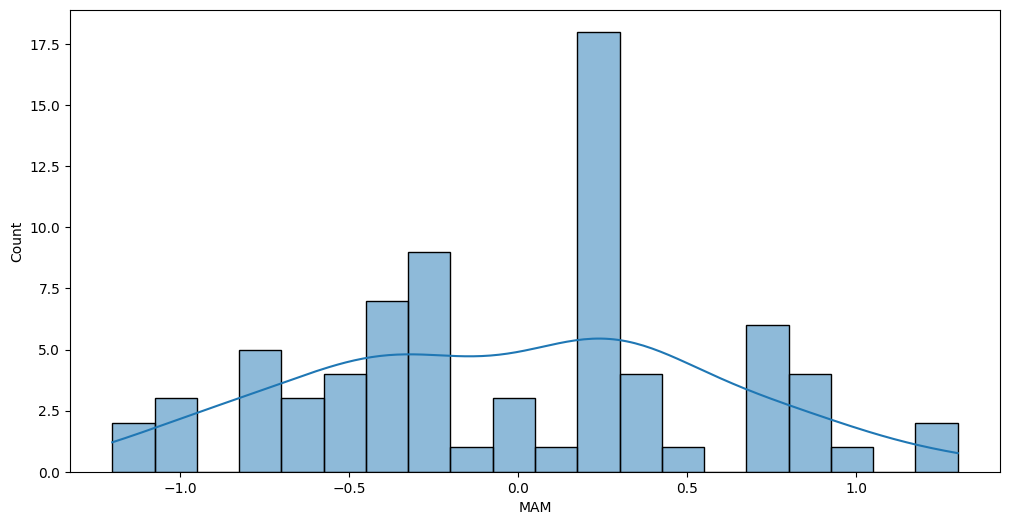

In [29]:
#plot MAM

plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(data['MAM'], bins=20, kde=True)

<Axes: xlabel='AMJ', ylabel='Count'>

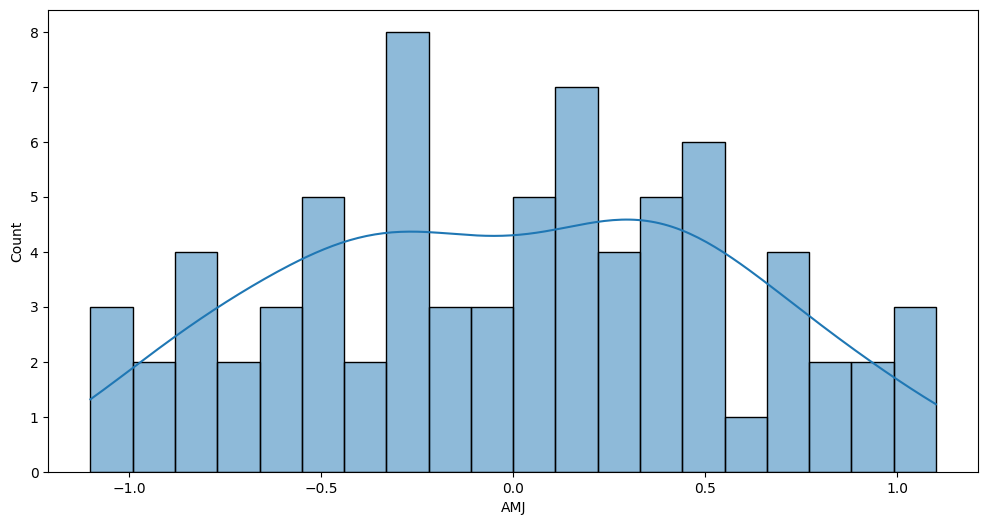

In [30]:
#plot AMJ

plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(data['AMJ'], bins=20, kde=True)

<Axes: xlabel='MJJ', ylabel='Count'>

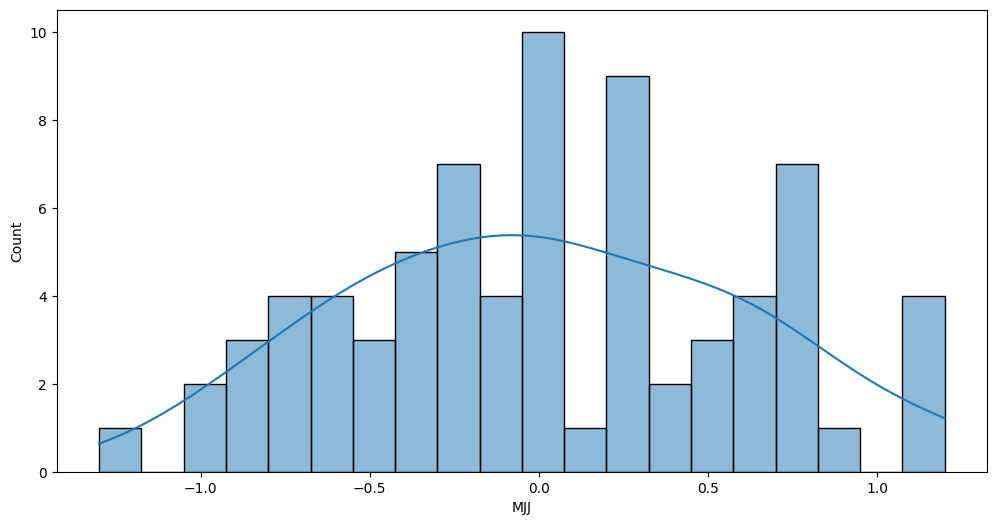

In [31]:
#plot MJJ

plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(data['MJJ'], bins=20, kde=True)

<Axes: xlabel='JJA', ylabel='Count'>

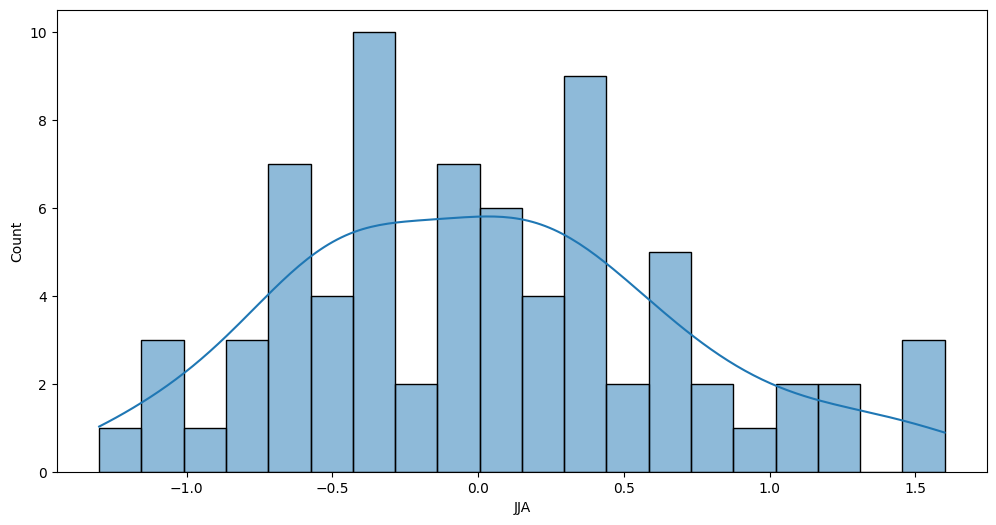

In [32]:
#plot JJA

plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(data['JJA'], bins=20, kde=True)

<Axes: xlabel='JAS', ylabel='Count'>

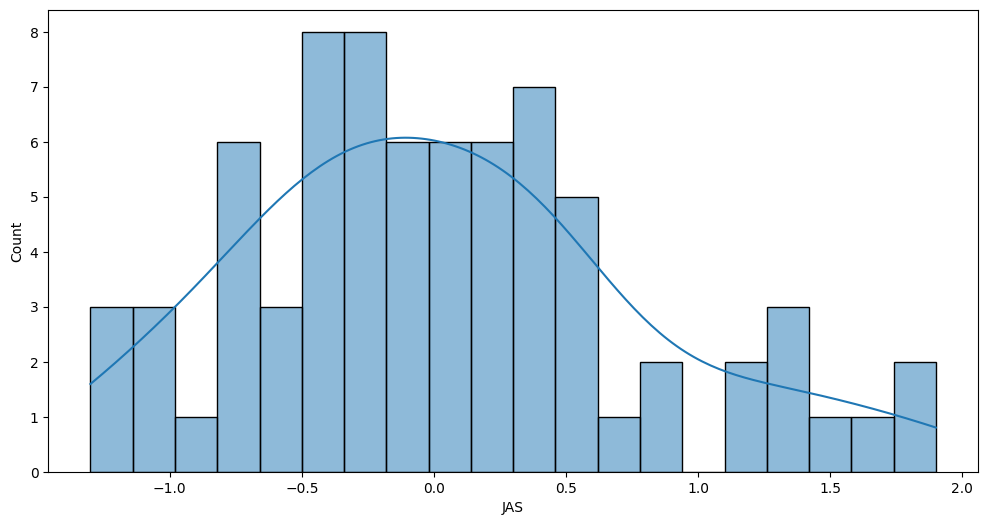

In [33]:
#plot JAS

plt.figure(figsize=(12, 6))

# Create the histogram

sns.histplot(data['JAS'], bins=20, kde=True)

<Axes: xlabel='ASO', ylabel='Count'>

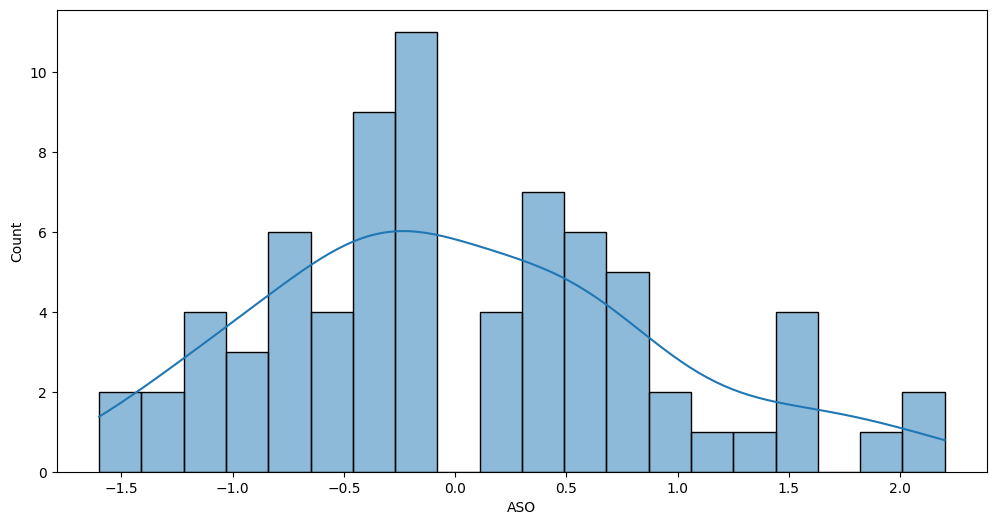

In [34]:
#plot ASO

plt.figure(figsize=(12, 6))

# Create the histogram

sns.histplot(data['ASO'], bins=20, kde=True)

<Axes: xlabel='SON', ylabel='Count'>

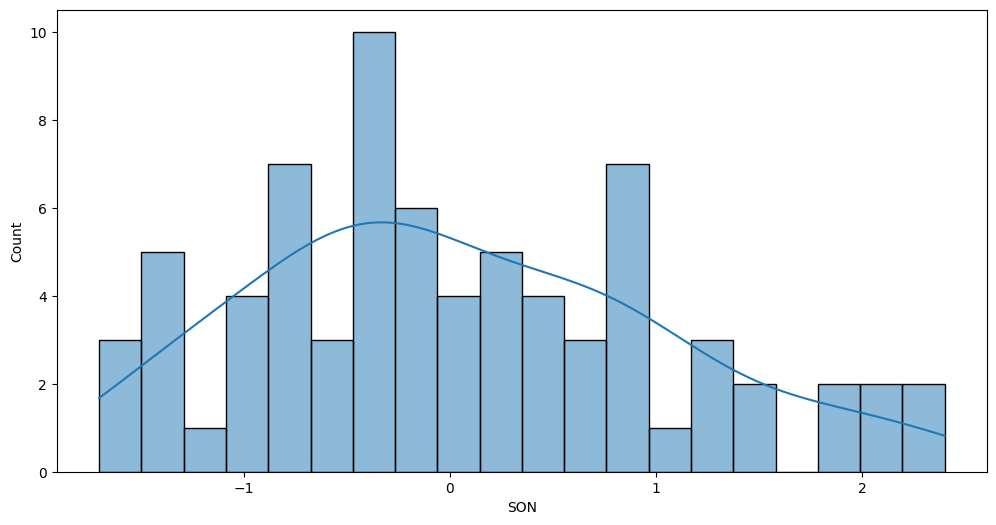

In [35]:
#plot SON

plt.figure(figsize=(12, 6))

# Create the histogram

sns.histplot(data['SON'], bins=20, kde=True)

<Axes: xlabel='OND', ylabel='Count'>

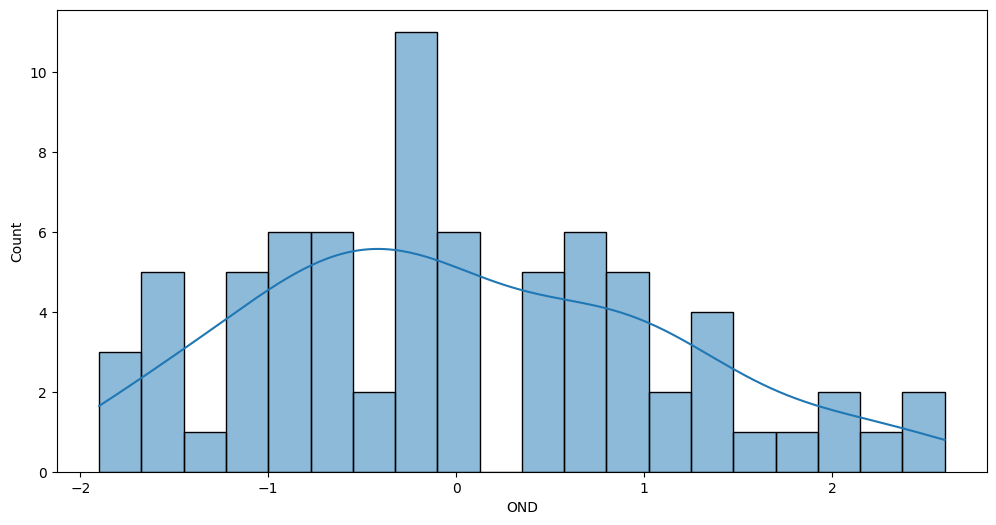

In [36]:
#plot OND

plt.figure(figsize=(12, 6))

# Create the histogram

sns.histplot(data['OND'], bins=20, kde=True)

<Axes: xlabel='NDJ', ylabel='Count'>

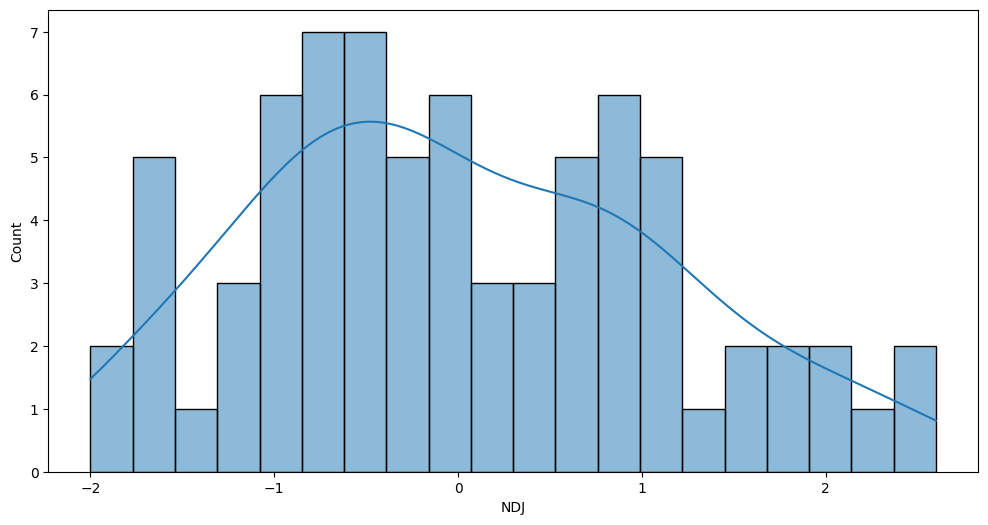

In [37]:
#plot NDJ

plt.figure(figsize=(12, 6))

# Create the histogram

sns.histplot(data['NDJ'], bins=20, kde=True)

<Axes: xlabel='early_spring', ylabel='Count'>

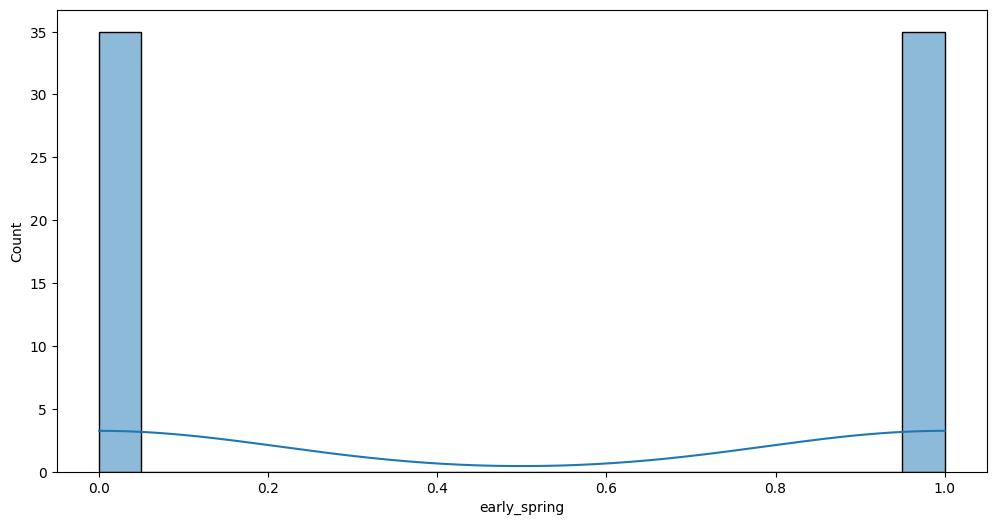

In [38]:
#early_spring

plt.figure(figsize=(12, 6))

# Create the histogram

sns.histplot(data['early_spring'], bins=20, kde=True)

In [39]:
data

max_temp_1  max_temp_2  max_temp_3  max_temp_4  max_temp_5  max_temp_6  \
year                                                                           
1947        30.0        44.0        54.0        42.0        33.0        33.0   
1948        46.0        41.0        32.0        34.0        34.0        32.0   
1949        31.0        34.0        40.0        43.0        55.0        54.0   
1950        49.0        53.0        61.0        69.0        54.0        53.0   
1951        40.0        46.0        52.0        50.0        41.0        46.0   
...          ...         ...         ...         ...         ...         ...   
2020        39.0        37.0        49.0        50.0        47.0        37.0   
2021        33.0        49.0        50.0        40.0        35.0        34.0   
2022        56.0        53.0        45.0        29.0        39.0        48.0   
2023        53.0        50.0        48.0        59.0        57.0        37.0   
2024        37.0        32.0        32.0        38.0        32.0        35.0   

      max_temp_7  max_temp_8  max_temp_9  max_temp_10  max_temp_11  \
year                                                                 
1947        34.0        35.0        31.0         30.0         49.0   
1948        32.0        41.0        49.0         33.0         30.0   
1949        49.0        56.0        61.0         53.0         45.0   
1950        43.0        30.0        48.0         59.0         55.0   
1951        36.0        23.0        30.0         46.0         40.0   
...          ...         ...         ...          ...          ...   
2020        41.0        34.0        33.0         39.0         53.0   
2021        35.0        35.0        32.0         34.0         37.0   
2022        26.0        19.0        34.0         42.0         23.0   
2023        34.0        33.0        39.0         35.0         40.0   
2024        34.0        34.0        36.0         45.0         42.0   

      max_temp_12  max_temp_13  max_temp_14  max_temp_15  max_temp_16  \
year                                                                    
1947         47.0         40.0         50.0         50.0         51.0   
1948         36.0         35.0         29.0         21.0         36.0   
1949         36.0         36.0         35.0         44.0         60.0   
1950         37.0         63.0         64.0         48.0         54.0   
1951         32.0         36.0         39.0         46.0         30.0   
...           ...          ...          ...          ...          ...   
2020         69.0         53.0         50.0         54.0         55.0   
2021         39.0         35.0         42.0         47.0         47.0   
2022         30.0         44.0         44.0         33.0         21.0   
2023         45.0         40.0         36.0         25.0         30.0   
2024         49.0         41.0         38.0         26.0         21.0   

      max_temp_17  max_temp_18  max_temp_19  max_temp_20  max_temp_21  \
year                                                                    
1947         49.0         42.0         44.0         54.0         46.0   
1948         28.0         16.0         27.0         40.0         39.0   
1949         59.0         45.0         60.0         36.0         38.0   
1950         43.0         50.0         28.0         26.0         40.0   
1951         49.0         56.0         60.0         66.0         58.0   
...           ...          ...          ...          ...          ...   
2020         38.0         28.0         47.0         28.0         26.0   
2021         32.0         35.0         31.0         37.0         39.0   
2022         31.0         31.0         29.0         44.0         25.0   
2023         47.0         48.0         39.0         48.0         36.0   
2024         17.0         18.0         29.0         25.0         16.0   

      max_temp_22  max_temp_23  max_temp_24  max_temp_25  max_temp_26  \
year                                                                    
1947    

In [40]:
#drop any column with day in it
data = data.drop(columns=[col for col in data if 'day' in col])

#code to check which values of early spring are NAN
data[data['early_spring'].isnull()]

#impute -1 into the NAN values of early_spring
data['early_spring'] = data['early_spring'].fillna(-1)

# make early_spring (True if its an early spring False if its not) 1 if its an early spring and 0 if its not an early spring
data['early_spring'] = data['early_spring'].astype(int)

data['early_spring'].value_counts()

#impute mean into NAN values of precipitation, snowfall, snowdepth
data = impute_mean_values(data)

/var/folders/l0/dbmbcpc16f56gkfqr8z2mvym0000gp/T/ipykernel_34883/634854143.py:168: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mean(), inplace=True)


In [41]:
from sklearn.model_selection import train_test_split

# stratify precipitation, snowfall, snowdepth columns

data = stratify_precipitation(data)
data = stratify_snowfall(data)
data = stratify_snowdepth(data)


data['combined_stratify'] = (
        data['early_spring'].astype(str) + '_' +
        data['precipitation_category'].astype(str) + '_' +
        data['snowfall_category'].astype(str) + '_' +
        data['snowdepth_category'].astype(str)
    )
# Create the combined stratification column
data = create_combined_stratify_column(data)

# Perform the train-test split, stratifying by the combined variable
train_data, test_data = train_test_split(data, test_size=0.1, random_state=42, stratify=data['combined_stratify']
)

KeyError: 'precipitation_category'

## Get the Data Notes

- Took 10% for test because of small data size
- Filled NAN values of early_spring with unknown and converted true and false to strings so I could stratify. 

Things I'm interested in for data visualizaion
- Do different days have more or less of an effect on whether its an early spring or not?

# Explore the Data

In [983]:


train_data['early_spring'].value_counts()

early_spring
1    32
0    31
Name: count, dtype: int64

In [984]:

# Create the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Fit the model to the training data
rf_model.fit(train_data.drop(columns=['early_spring']), train_data['early_spring'])

# Get feature importances from the model
feature_importances = rf_model.feature_importances_

# Create a DataFrame from the feature importances
feature_importances_df = pd.DataFrame({
    'feature': train_data.drop(columns=['early_spring']).columns,
    'importance': feature_importances
})

# Sort values by importance
feature_importances_df = feature_importances_df.sort_values('importance', ascending=False)

feature_importances_df

feature  importance
371     mean_soil_temp_36    0.013644
52            max_temp_53    0.011507
388     mean_soil_temp_53    0.011100
282           snowdepth_3    0.010803
539  min_soil_moisture_36    0.009819
..                    ...         ...
4              max_temp_5    0.000000
14            max_temp_15    0.000000
13            max_temp_14    0.000000
641  max_soil_moisture_26    0.000000
3              max_temp_4    0.000000

[684 rows x 2 columns]

In [985]:
# Max Soil Temperature
max_soil_temp_values = pd.melt(data, value_vars=[col for col in data if 'max_soil_temp' in col],
                               var_name='Max_Soil_Temperature_Type', value_name='Max_Soil_Temperature')

# Min Soil Temperature
min_soil_temp_values = pd.melt(data, value_vars=[col for col in data if 'min_soil_temp' in col],
                               var_name='Min_Soil_Temperature_Type', value_name='Min_Soil_Temperature')

# Average Soil Temperature
avg_soil_temp_values = pd.melt(data, value_vars=[col for col in data if 'avg_soil_temp' in col],
                               var_name='Avg_Soil_Temperature_Type', value_name='Avg_Soil_Temperature')

# Max Temperature
max_temp_values = pd.melt(data, value_vars=[col for col in data if 'max_temp' in col],
                          var_name='Max_Temperature_Type', value_name='Max_Temperature')

# Min Temperature
min_temp_values = pd.melt(data, value_vars=[col for col in data if 'min_temp' in col],
                          var_name='Min_Temperature_Type', value_name='Min_Temperature')

# Average Temperature
avg_temp_values = pd.melt(data, value_vars=[col for col in data if 'avg_temp' in col],
                          var_name='Avg_Temperature_Type', value_name='Avg_Temperature')

# Precipitation
precipitation_values = pd.melt(data, value_vars=[col for col in data if 'precipitation' in col],
                               var_name='Precipitation_Type', value_name='Precipitation')

# Snowfall
snowfall_values = pd.melt(data, value_vars=[col for col in data if 'snowfall' in col],
                          var_name='Snowfall_Type', value_name='Snowfall')

# Snow Depth
snowdepth_values = pd.melt(data, value_vars=[col for col in data if 'snowdepth' in col],
                           var_name='Snowdepth_Type', value_name='Snowdepth')

# Mean Soil Moisture
mean_soil_moisture_values = pd.melt(data, value_vars=[col for col in data if 'mean_soil_moisture' in col],
                                    var_name='Mean_Soil_Moisture_Type', value_name='Mean_Soil_Moisture')

# Max Soil Moisture
max_soil_moisture_values = pd.melt(data, value_vars=[col for col in data if 'max_soil_moisture' in col],
                                   var_name='Max_Soil_Moisture_Type', value_name='Max_Soil_Moisture')

# Min Soil Moisture
min_soil_moisture_values = pd.melt(data, value_vars=[col for col in data if 'min_soil_moisture' in col],
                                   var_name='Min_Soil_Moisture_Type', value_name='Min_Soil_Moisture')

# Mean Soil Temperature
mean_soil_temp_values = pd.melt(data, value_vars=[col for col in data if 'mean_soil_temp' in col],
                                var_name='Mean_Soil_Temperature_Type', value_name='Mean_Soil_Temperature')



In [986]:
def combine_data(max_soil_temp_values, min_soil_temp_values, avg_soil_temp_values,
                 max_temp_values, min_temp_values, avg_temp_values,
                 precipitation_values, snowfall_values, snowdepth_values,
                 mean_soil_moisture_values, max_soil_moisture_values, min_soil_moisture_values,
                 mean_soil_temp_values,
                 train_data):
    """
    Combines the given DataFrames into a single DataFrame with the following columns:
    - Max_Soil_Temperature
    - Min_Soil_Temperature
    - Avg_Soil_Temperature
    - Max_Temperature
    - Min_Temperature
    - Avg_Temperature
    - Precipitation
    - Snowfall
    - Snowdepth
    - Mean_Soil_Moisture
    - Max_Soil_Moisture
    - Min_Soil_Moisture
    - early_spring
    """

    combined_data = pd.merge(max_soil_temp_values[['Max_Soil_Temperature']],
                             min_soil_temp_values[['Min_Soil_Temperature']],
                             left_index=True, right_index=True)

    combined_data = pd.merge(combined_data,
                             avg_soil_temp_values[['Avg_Soil_Temperature']],
                             left_index=True, right_index=True)

    combined_data = pd.merge(combined_data,
                             max_temp_values[['Max_Temperature']],
                             left_index=True, right_index=True)

    combined_data = pd.merge(combined_data,
                             min_temp_values[['Min_Temperature']],
                             left_index=True, right_index=True)

    combined_data = pd.merge(combined_data,
                             avg_temp_values[['Avg_Temperature']],
                             left_index=True, right_index=True)

    combined_data = pd.merge(combined_data,
                             precipitation_values[['Precipitation']],
                             left_index=True, right_index=True)

    combined_data = pd.merge(combined_data,
                             snowfall_values[['Snowfall']],
                             left_index=True, right_index=True)

    combined_data = pd.merge(combined_data,
                             snowdepth_values[['Snowdepth']],
                             left_index=True, right_index=True)

    combined_data = pd.merge(combined_data,
                             mean_soil_moisture_values[['Mean_Soil_Moisture']],
                             left_index=True, right_index=True)

    combined_data = pd.merge(combined_data,
                             max_soil_moisture_values[['Max_Soil_Moisture']],
                             left_index=True, right_index=True)

    combined_data = pd.merge(combined_data,
                             min_soil_moisture_values[['Min_Soil_Moisture']],
                             left_index=True, right_index=True)
    
    combined_data = pd.merge(combined_data,
                            mean_soil_temp_values[['Mean_Soil_Temperature']],
                            left_index=True, right_index=True)

    combined_data = pd.merge(combined_data,
                             train_data[['early_spring']],
                             left_index=True, right_index=True)
    
    combined_data = pd.merge(combined_data,
                             train_data[['DJF']],
                             left_index=True, right_index=True)
    
    combined_data = pd.merge(combined_data,
                                train_data[['JFM']],
                                left_index=True, right_index=True)
    
    combined_data = pd.merge(combined_data,
                                train_data[['FMA']],
                                left_index=True, right_index=True)
    
    combined_data = pd.merge(combined_data,
                                train_data[['MAM']],
                                left_index=True, right_index=True)
    
    combined_data = pd.merge(combined_data,
                                train_data[['AMJ']],
                                left_index=True, right_index=True)
    
    combined_data = pd.merge(combined_data,
                                train_data[['MJJ']],
                                left_index=True, right_index=True)
    
    combined_data = pd.merge(combined_data,
                                train_data[['JJA']],
                                left_index=True, right_index=True)
    
    combined_data = pd.merge(combined_data,
                                train_data[['JAS']],
                                left_index=True, right_index=True)
    
    combined_data = pd.merge(combined_data,
                                train_data[['ASO']],
                                left_index=True, right_index=True)
    
    combined_data = pd.merge(combined_data,
                                train_data[['SON']],
                                left_index=True, right_index=True)
    
    combined_data = pd.merge(combined_data,
                                train_data[['OND']],
                                left_index=True, right_index=True)
    
    combined_data = pd.merge(combined_data,
                                train_data[['NDJ']],
                                left_index=True, right_index=True)

    combined_data.columns = ['Max_Soil_Temperature', 'Min_Soil_Temperature', 'Avg_Soil_Temperature',
                             'Max_Temperature', 'Min_Temperature', 'Avg_Temperature', 'Precipitation',
                             'Snowfall', 'Snowdepth', 'Mean_Soil_Moisture', 'Max_Soil_Moisture',
                             'Min_Soil_Moisture', 'Mean_Soil_Temp', 'early_spring', 'DJF', 'JFM', 'FMA', 'MAM', 'AMJ', 'MJJ', 'JJA', 'JAS', 'ASO', 'SON', 'OND', 'NDJ']
    
    return combined_data

combined_data = combine_data(max_soil_temp_values, min_soil_temp_values, avg_soil_temp_values,
                             max_temp_values, min_temp_values, avg_temp_values,
                             precipitation_values, snowfall_values, snowdepth_values,
                             mean_soil_moisture_values, max_soil_moisture_values, min_soil_moisture_values, mean_soil_temp_values,
                             train_data)

combined_data.columns = ['Max_Soil_Temperature', 'Min_Soil_Temperature', 'Avg_Soil_Temperature',
                         'Max_Temperature', 'Min_Temperature', 'Avg_Temperature', 'Precipitation',
                         'Snowfall', 'Snowdepth', 'Mean_Soil_Moisture', 'Max_Soil_Moisture',
                         'Min_Soil_Moisture', 'Mean_Soil_Temp', 'early_spring', 'DJF', 'JFM', 'FMA', 'MAM', 'AMJ', 'MJJ', 'JJA', 'JAS', 'ASO', 'SON', 'OND', 'NDJ']


In [987]:
combined_data

Max_Soil_Temperature  Min_Soil_Temperature Avg_Soil_Temperature  \
1947                  -1.2                  -1.2                 28.0   
1948                   1.2                   0.6                 54.0   
1949                  -0.3                  -0.8                 36.0   
1950                  -6.5                 -13.4                 31.0   
1951                  -1.2                  -1.3                 23.0   
...                    ...                   ...                  ...   
2020                  -9.4                 -15.3                  7.0   
2021                  -1.3                  -1.3                 25.0   
2022                  -0.7                  -0.8                 42.0   
2023                   2.7                   0.7                 33.0   
2024                   3.6                   0.6                 49.0   

      Max_Temperature  Min_Temperature  Avg_Temperature  Precipitation  \
1947             28.0             21.0             24.5         0.0500   
1948             54.0             29.0             41.5         0.1400   
1949             36.0              9.0             22.5         0.2400   
1950             31.0             -9.0             11.0         0.0400   
1951             23.0              0.0             11.5         0.0500   
...               ...              ...              ...            ...   
2020              7.0            -13.0             -3.0         0.0000   
2021             25.0              1.0             13.0         0.0025   
2022             42.0             15.0             28.5         0.0100   
2023             33.0             26.0             29.5         0.0025   
2024             49.0             23.0             36.0         0.0000   

      Snowfall  Snowdepth  Mean_Soil_Moisture  Max_Soil_Moisture  \
1947    1.0000      4.000            0.459708              0.460   
1948    0.0000      0.000            0.483875              0.487   
1949    0.0025      3.000            0.473917              0.520   
1950    1.0000      4.000            0.468000              0.468   
1951    1.0000      9.000            0.466625              0.468   
...        ...        ...                 ...                ...   
2020    0.0000      3.000            0.468000              0.468   
2021    0.0025      8.000            0.465083              0.466   
2022    0.1000      0.025            0.480375              0.482   
2023    0.0025      2.000            0.471750              0.474   
2024    0.0000      0.000            0.484083              0.488   

      Min_Soil_Moisture  Mean_Soil_Temp  early_spring  DJF  JFM  FMA  MAM  \
1947              0.459       -1.200000             0  NaN  NaN  NaN  NaN   
1948              0.480        0.837500             0  NaN  NaN  NaN  NaN   
1949              0.460       -0.637500             1  NaN  NaN  NaN  NaN   
1950              0.468      -10.425000             0 -1.5  NaN  NaN  NaN   
1951              0.466       -1.266667             0 -0.8 -1.3 -1.2 -1.2   
...                 ...             ...           ...  ...  ...  ...  ...   
2020              0.468      -12.466667             1  0.5  0.7  0.7  0.7   
2021              0.464       -1.300000             1 -1.0  0.5  0.4  0.2   
2022              0.479       -0.716667             1 -1.0 -0.9 -0.8 -0.7   
2023              0.468        1.287500             1 -0.7 -0.9 -1.0 -1.1   
2024              0.480        1.691667             1  1.8 -0.4 -0.1  0.2   

      AMJ  MJJ  JJA  JAS  ASO  SON  OND  NDJ  
1947  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1948  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1949  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1950  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1951 -1.1 -0.9 -0.5 -0.4 -0.4 -0.4 -0.6 -0.8  
...   ...  ...  ...  ...  ...  ...  ...  ...  
2020  0.5  0.5  0.3  0.1  0.2  0.3  0.5  0.5  
2021 -0.1 -0.3 -0.4 -0.6 -0.9 -1.2 -1.3 -1.2  
2022 -0.5 -0.4 -0.4 -0.5 -0.7 -0.8 -1.0 -1.0  
2023 -1.0 -0.9 -0.8 -0.9 -1.

In [988]:
# Check the data types of each column
print(combined_data.dtypes)

Max_Soil_Temperature    float64
Min_Soil_Temperature    float64
Avg_Soil_Temperature     object
Max_Temperature         float64
Min_Temperature         float64
Avg_Temperature         float64
Precipitation           float64
Snowfall                float64
Snowdepth               float64
Mean_Soil_Moisture      float64
Max_Soil_Moisture       float64
Min_Soil_Moisture       float64
Mean_Soil_Temp          float64
early_spring              int64
DJF                     float64
JFM                     float64
FMA                     float64
MAM                     float64
AMJ                     float64
MJJ                     float64
JJA                     float64
JAS                     float64
ASO                     float64
SON                     float64
OND                     float64
NDJ                     float64
dtype: object


In [989]:
# convert Avg_Temperature to float
combined_data['Avg_Soil_Temperature'] = combined_data['Avg_Temperature'].astype(float)
combined_data['Avg_Soil_Temperature'].dtype

dtype('float64')

In [990]:
def detect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers

# Check for outliers in numerical columns
for col in combined_data.select_dtypes(include=['float64', 'int64']).columns:
    print(f"Outliers in {col}:")
    print(detect_outliers(combined_data[col]).shape)


Outliers in Max_Soil_Temperature:
(10,)
Outliers in Min_Soil_Temperature:
(8,)
Outliers in Avg_Soil_Temperature:
(0,)
Outliers in Max_Temperature:
(5,)
Outliers in Min_Temperature:
(2,)
Outliers in Avg_Temperature:
(0,)
Outliers in Precipitation:
(7,)
Outliers in Snowfall:
(7,)
Outliers in Snowdepth:
(4,)
Outliers in Mean_Soil_Moisture:
(0,)
Outliers in Max_Soil_Moisture:
(0,)
Outliers in Min_Soil_Moisture:
(0,)
Outliers in Mean_Soil_Temp:
(7,)
Outliers in early_spring:
(0,)
Outliers in DJF:
(0,)
Outliers in JFM:
(0,)
Outliers in FMA:
(0,)
Outliers in MAM:
(0,)
Outliers in AMJ:
(0,)
Outliers in MJJ:
(0,)
Outliers in JJA:
(0,)
Outliers in JAS:
(1,)
Outliers in ASO:
(0,)
Outliers in SON:
(0,)
Outliers in OND:
(0,)
Outliers in NDJ:
(0,)


In [991]:
# checking for missing values as a percentage 
missing_values = combined_data.isnull().sum() / combined_data.shape[0] * 100
missing_values[missing_values > 0]


Snowdepth    1.587302
DJF          4.761905
JFM          6.349206
FMA          6.349206
MAM          6.349206
AMJ          6.349206
MJJ          6.349206
JJA          6.349206
JAS          6.349206
ASO          6.349206
SON          6.349206
OND          6.349206
NDJ          6.349206
dtype: float64

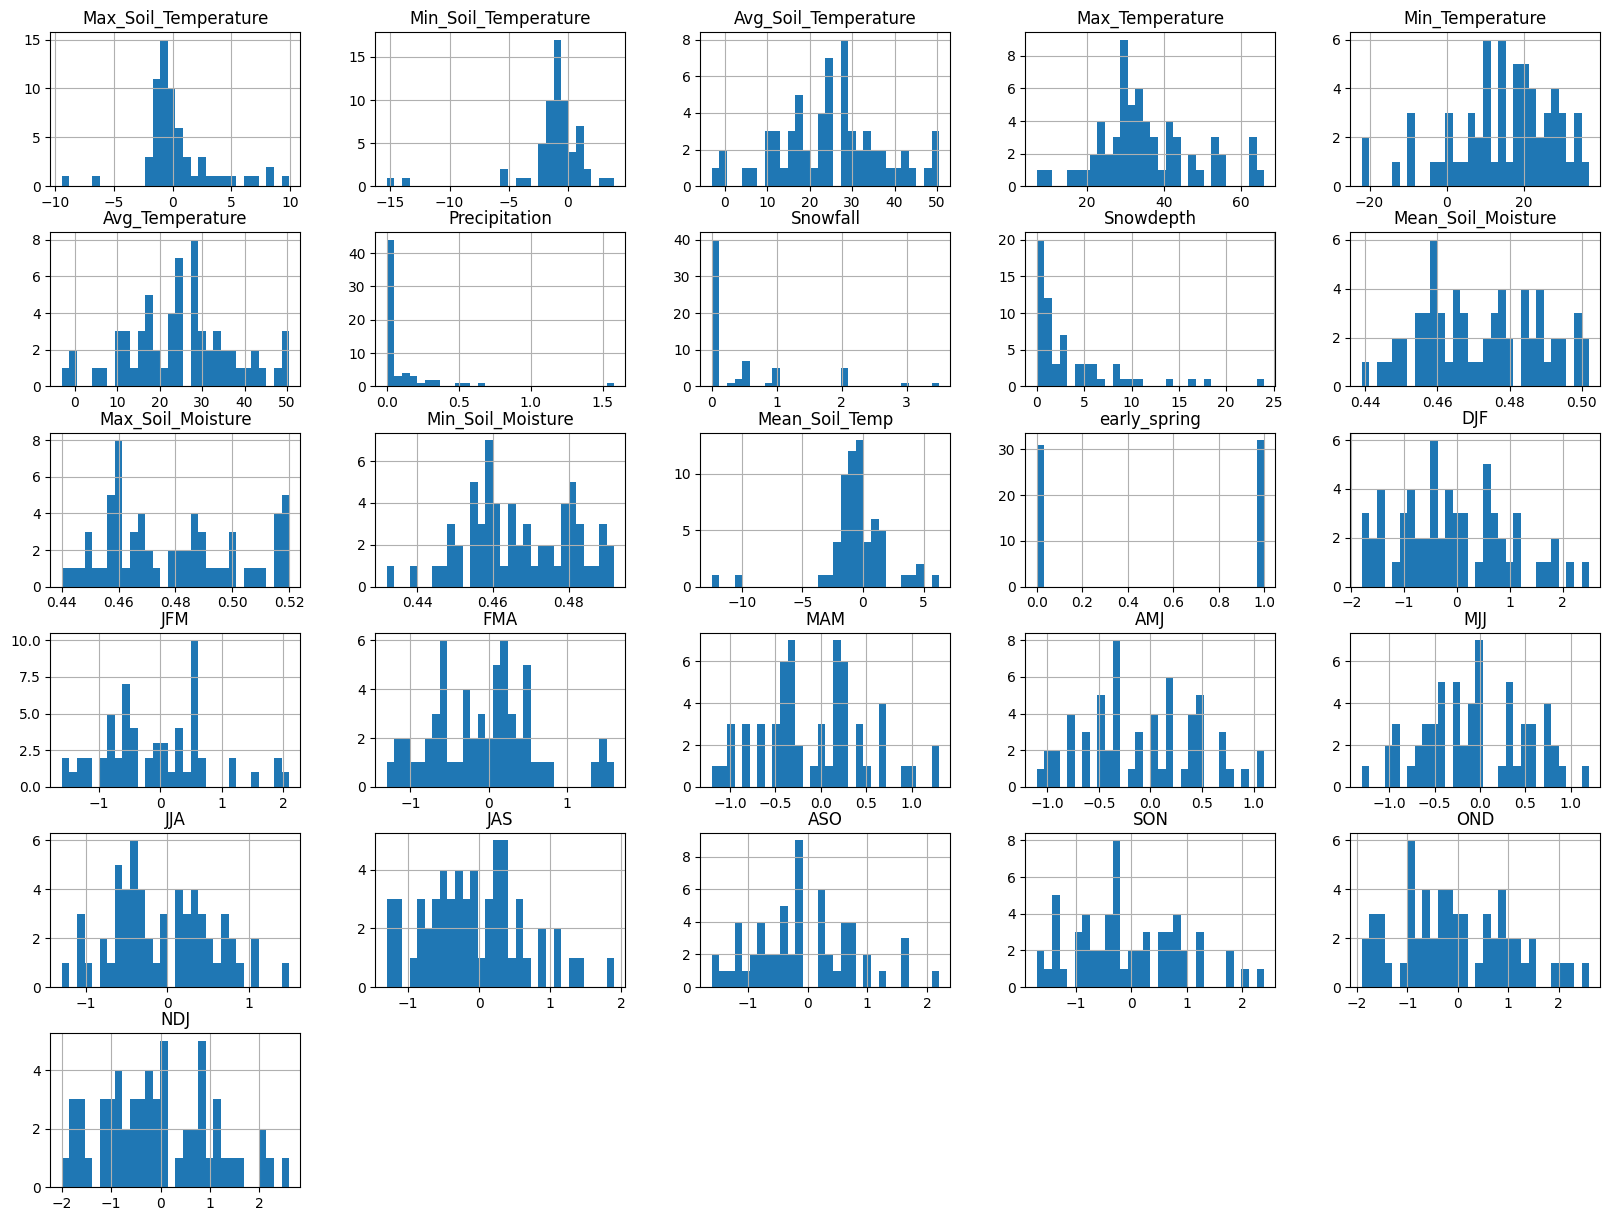

In [992]:
# histrogram of combined data 
combined_data.hist(figsize=(20, 15), bins=30)
plt.show()

| **Feature**         | **Type**       | **% Missing Values**  | **Noisiness (Outliers, Gaps, etc.)** | **Usefulness (Business Goal)**                          | **Distribution**                                          |
|---------------------|----------------|-----------------------|--------------------------------------|---------------------------------------------------------|-----------------------------------------------------------|
| max_temp            | numerical       | 0%                | Outliers detected (5)                | Highly useful (affects early spring)                     | Normal distribution with slight skew                      |
| min_temp            | numerical       | 0%                | Outliers detected (2)                | Highly useful (affects early spring)                     | Normal distribution with slight skew                      |
| avg_temp            | numerical       | 0%                | No outliers detected                 | Highly useful (affects early spring)                     | Normal distribution                                       |
| precipitation       | numerical       | 0%                | Outliers detected (7)                | Somewhat useful (affects snow/soil)                      | Highly skewed (low values dominate) - Log Normal          |
| snowfall            | numerical       | 0%                | Outliers detected (7)                | Important for snow coverage                              | Normal distribution            |
| snowdepth           | numerical       | 1.587302%                | Outliers detected (4)                | Useful (indicates snow cover)                            | Normal Distribution                |
| early_spring        | categorical            | 0%                | No issues detected                   | Target variable                                          | Binary: True/False                                        |
| mean_soil_moisture  | numerical       | 0%                | No outliers detected                 | Useful for predicting soil conditions                    | Skewed, concentrated around a median                      |
| min_soil_temp       | numerical       | 0%                | Outliers detected (8)                | Relevant (affects soil temperature)                      | Skewed, with negative values                              |
| min_soil_moisture   | numerical       | 0%                | No outliers detected                 | Some relevance                                           | Skewed, concentrated in a narrow range                    |
| max_soil_temp       | numerical       | 0%                | Outliers detected (10)               | Relevant for planting decisions                          | Skewed but centered                                       |
| max_soil_moisture   | numerical       | 0%                | No outliers detected                 | Useful for soil moisture trends                          | Right-Skewed Distribution                                 |
| mean_soil_temp       | numerical       | 0%                | Outliers detected (7)               | Relevant for planting decisions                          | Skewed but centered                                       |
| DJF                 | numerical       | 4.761905%                | Outliers detected (0)   | Useful for El Nino changes                               | Slightly skewed, sort of Normal                           |
| JFM             | numerical       | 6.349206%                  | Outliers detected (0)                   | Useful for seasonal analysis (Winter months)             | Normal Distribution                   |
| FMA             | numerical       | 6.349206%                  | Outliers detected (0)                   | Useful for seasonal analysis (spring months)             | Normal Distribution                   |
| MAM             | numerical       | 6.349206%                  | Outliers detected (0)                  | Useful for seasonal analysis (spring months)             | Bimodial distribution                  |
| AMJ             | numerical       | 6.349206%                  | Outliers detected (0)                  | Useful for planting windows (late spring to early summer)| Normal Distribution                 |
| MJJ             | numerical       | 6.349206%                  | Outliers detected (0)                  | Useful for seasonal analysis (Summer months)             | Normal distribution                  |
| JJA             | numerical       | 6.349206%                  | Outliers detected (0)                 | Relevant for summer months                              | Normal distribution              |
| JAS             | numerical       | 6.349206%                  | Outliers detected (0)                 | Useful for late summer and harvesting trends             | Normal distribution                                               |
| ASO             | numerical       | 6.349206%                  | Outliers detected (0)                | Useful for late summer to early fall analysis            | Normal distribution                                |
| SON             | numerical       | 6.349206%                  | Outliers detected (0)                   | Relevant for fall seasons                                | Normal distribution                   |
| OND             | numerical       | 6.349206%                  | Outliers detected (0)                   | Useful for winter changes                                | Normal distribution             |
| NDJ             | numerical       | 6.349206%                  | Outliers detected (0)                   | Relevant for early winter                                | Bimodial distribution                         |


1. **Temperature Features (Max, Min, Avg)**:
   - These temperature features (max, min, and average) are highly useful for predicting early spring as they influence the soil temperature and overall growth conditions.
   - The distributions for these features are generally normal with slight skew, meaning that the majority of values are concentrated around the mean with a few outliers, particularly in extreme weather conditions.
   - No missing values are present, making these features reliable for modeling.

2. **Soil Moisture and Soil Temperature**:
   - These features are crucial for understanding the planting conditions, especially `mean_soil_moisture` and `max_soil_moisture`, which have a skewed but centered distribution. This suggests that soil moisture is consistent in certain ranges but there are outliers that may impact planting.
   - `max_soil_temp` and `min_soil_temp` are also essential as they affect planting decisions directly by indicating optimal growing conditions.
   - The distribution shows a skew towards certain values, indicating variability in soil moisture and temperature across the dataset, but no significant gaps or missing values were detected.

3. **Seasonal Features (FMA, MAM, etc.)**:
   - These features represent important seasonal trends for various months and combinations of months (e.g., FMA for February-March-April).
   - They are generally normally distributed with minor outliers, which is expected given seasonal temperature variations.
   - The usefulness of these features comes from their relevance to key planting and growing seasons, particularly spring and early summer, which influence the early spring predictions.

4. **Precipitation and Snowfall**:
   - These features are skewed, with precipitation and snowfall having highly skewed log-normal distributions. The majority of the values are low, but there are a few extreme cases.
   - Despite this skew, these features are still somewhat useful for understanding snow/soil dynamics, which indirectly affect early spring predictions.
   - These variables have no missing values, but the outliers may need further exploration to understand their impact on the model.

5. **DJF (December, January, February)**:
   - The `DJF` feature is used for analyzing El Nino and winter season changes. It shows some gaps and a slightly skewed distribution.
   - The feature could provide insights into the influence of winter temperature trends on the onset of early spring, particularly in extreme conditions like El Nino years.

6. **Early Spring**:
   - This is the target variable and has no missing values or issues detected. It is binary (True/False), which makes it ideal for classification tasks.
   - The overall model should focus on correlating other features to this target variable to make accurate predictions about early spring.

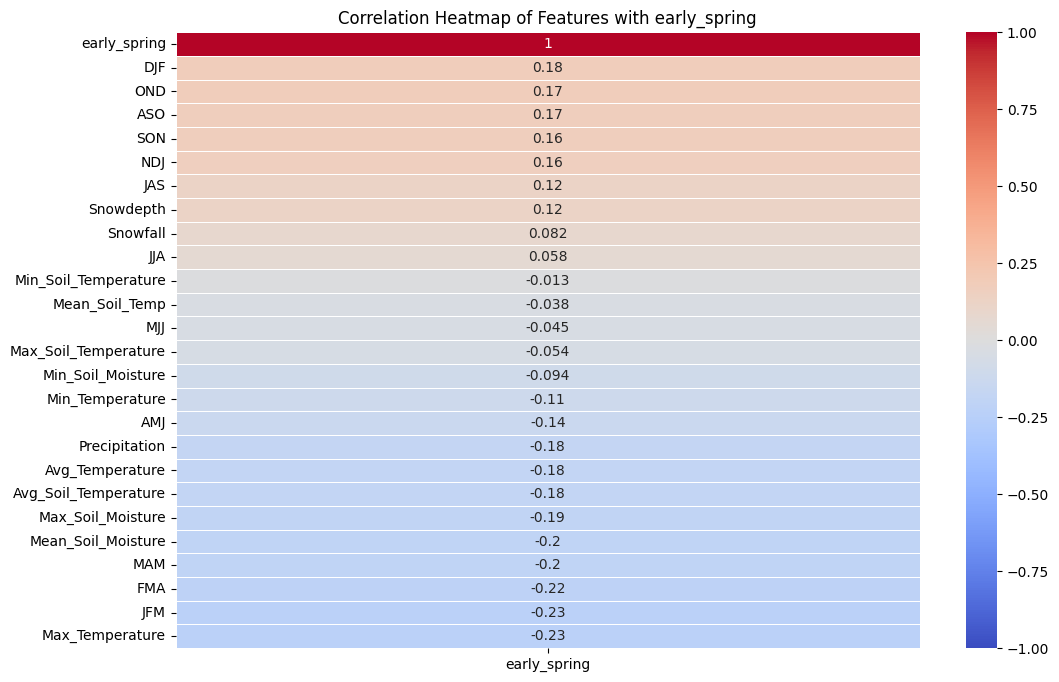

In [993]:
correlation_matrix = combined_data.corr()

# Set the figure size for better readability
plt.figure(figsize=(12, 8))

# Plot the heatmap
sns.heatmap(correlation_matrix[['early_spring']].sort_values(by='early_spring', ascending=False), 
            annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Heatmap of Features with early_spring')
plt.show()

- **DJF** (December-January-February temperatures) has the highest positive correlation with `early_spring` (0.18). This suggests that winter temperatures may have a significant impact on predicting early spring, likely because warmer winters lead to earlier spring conditions.

- **OND, ASO, SON, and NDJ** also show moderate positive correlations (between 0.12 to 0.18) with `early_spring`. These months represent fall and early winter, indicating that seasonal transition periods may influence early spring conditions.

- **JFM, FMA, and MAM** have a strong negative correlation with `early_spring` (between -0.2 to -0.23). These months represent from winter to spring, showcasing that these transitions have a influence to the target label.

- **Snow-related features**:
  - **Snowdepth** and **Snowfall** have weaker correlations with `early_spring` (0.058 and 0.082, respectively). This suggests that while snow features are relevant, they may not be as predictive as temperature variables.

- **Soil Temperature and Moisture**:
  - The **Min, Max, and Avg Soil Temperatures** have negative correlations with `early_spring`. The correlation is from -0.18 to -0.2, and this could have some sort of influence to the target label as well. 
  - **Soil Moisture** (min) also shows weak correlation, with no strong predictive influence over early spring.

- **Precipitation and Temperature**:
  - **Precipitation** and **Temperature** (Max, Min, Avg) show small negative correlations with `early_spring`, with the highest being -0.23. These results suggest that precipitation and general temperature trends during the year may have some inverse relationship with early spring predictions, but they are not strong indicators in isolation.

### Key Takeaways:
1. **DJF and Fall/Winter Periods** have the most positive correlations with `early_spring`, indicating that winter temperatures play a significant role in early spring predictions.
2. **Snow Features** have weak correlations, suggesting their impact on predicting early spring is minor compared to temperature.
3. **Soil Temperature and Moisture** have a strong negative correlationi, suggesting that soil temperature and moisture have some indication towards an early spring, but not as heavy as some soil and moisture features also lie with a weak correlation as well. 

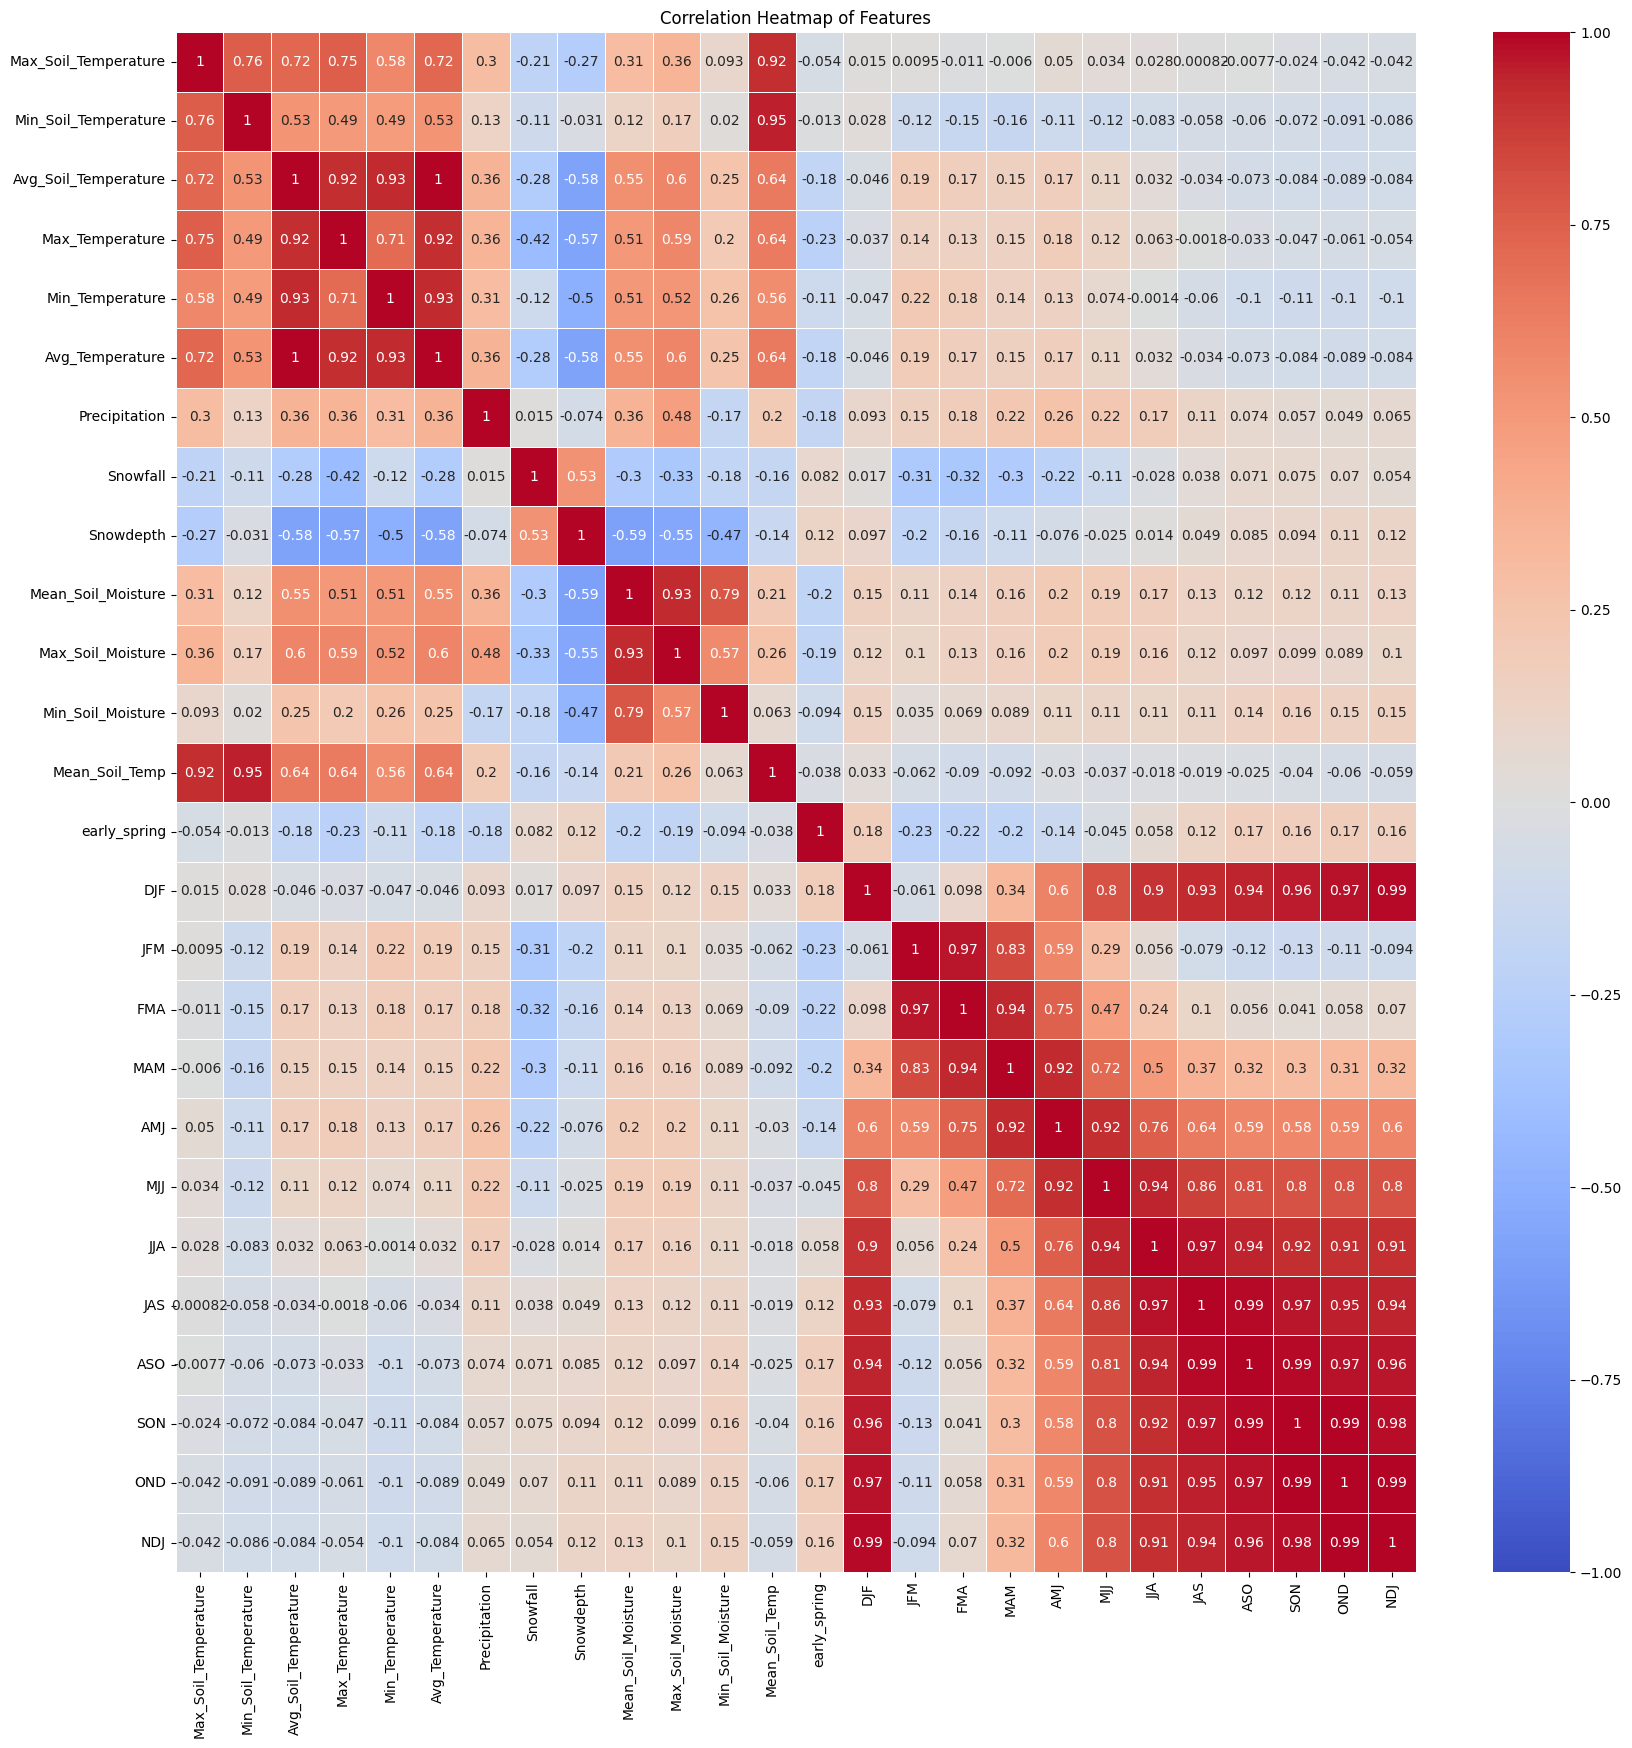

In [994]:
# feature correlations heat map 
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

1. **Strong Correlation Between Temperature Features**:
   - `Max_Soil_Temperature`, `Min_Soil_Temperature`, `Avg_Soil_Temperature`, `Max_Temperature`, `Min_Temperature`, and `Avg_Temperature` are highly correlated with each other (values around 0.93–1.00).
   - This suggests that these temperature features are interrelated, and including all of them in the model might lead to redundancy. Dimensionality reduction techniques (like PCA) or feature selection could be useful to avoid multicollinearity.

2. **Correlation with Early Spring**:
   - `Snowdepth` shows a negative correlation (-0.19) with `early_spring`, indicating that lower snow depth might be associated with the early onset of spring.
   - `Precipitation` has a moderate negative correlation (-0.18) with `early_spring`, suggesting that lower precipitation might be a factor in predicting early spring.
   - Temperature features such as `Max_Soil_Temperature`, `Min_Soil_Temperature`, and `Avg_Soil_Temperature` show correlations with `early_spring`, with values around 0.13–0.18, indicating their importance but not as primary predictors.

3. **Snowfall and Soil Moisture Relationships**:
   - `Snowfall` is negatively correlated with `Soil_Temperature` features and `Snowdepth`, as expected. More snowfall tends to lead to higher snow depth, which impacts soil temperature.
   - `Snowfall` also shows a negative correlation (-0.55) with `Snowdepth`, and this relationship is important in understanding how snow coverage influences soil conditions.

4. **Seasonal Features (DJF, FMA, etc.)**:
   - The seasonal features (DJF, JFM, FMA, etc.) are highly correlated with each other, which is natural because they represent overlapping time periods (like December-February, January-March).
   - `DJF` and similar features show correlations with `early_spring`, with values ranging from 0.1 to 0.18. These features could be significant for modeling early spring, but the influence of seasonal temperature may need further exploration.

5. **Soil Moisture**:
   - `Mean_Soil_Moisture`, `Max_Soil_Moisture`, and `Min_Soil_Moisture` show correlations with `early_spring`, indicating that moisture levels may not have a strong direct impact on early spring predictions.
   - However, these features still hold relevance, especially when combined with other environmental conditions like temperature and snow depth.

### Key Insights:
- **Temperature features** are highly correlated with each other but only show direct correlations with `early_spring`. These features may still play a role in modeling but could be redundant.
- **Precipitation and snow-related features** like `Snowfall` and `Snowdepth` have to moderate negative correlations with `early_spring`, meaning they could be useful for predictions but are not dominant factors.
- **Seasonal indicators** show correlations with `early_spring`, but their combination with other features like soil temperature and snow conditions could improve model performance.

### Next Steps:
- Consider reducing dimensionality for highly correlated temperature features to avoid overfitting.
- Focus on interactions between precipitation, snow, and soil temperature to model early spring more effectively.

<Figure size 2000x2000 with 0 Axes>

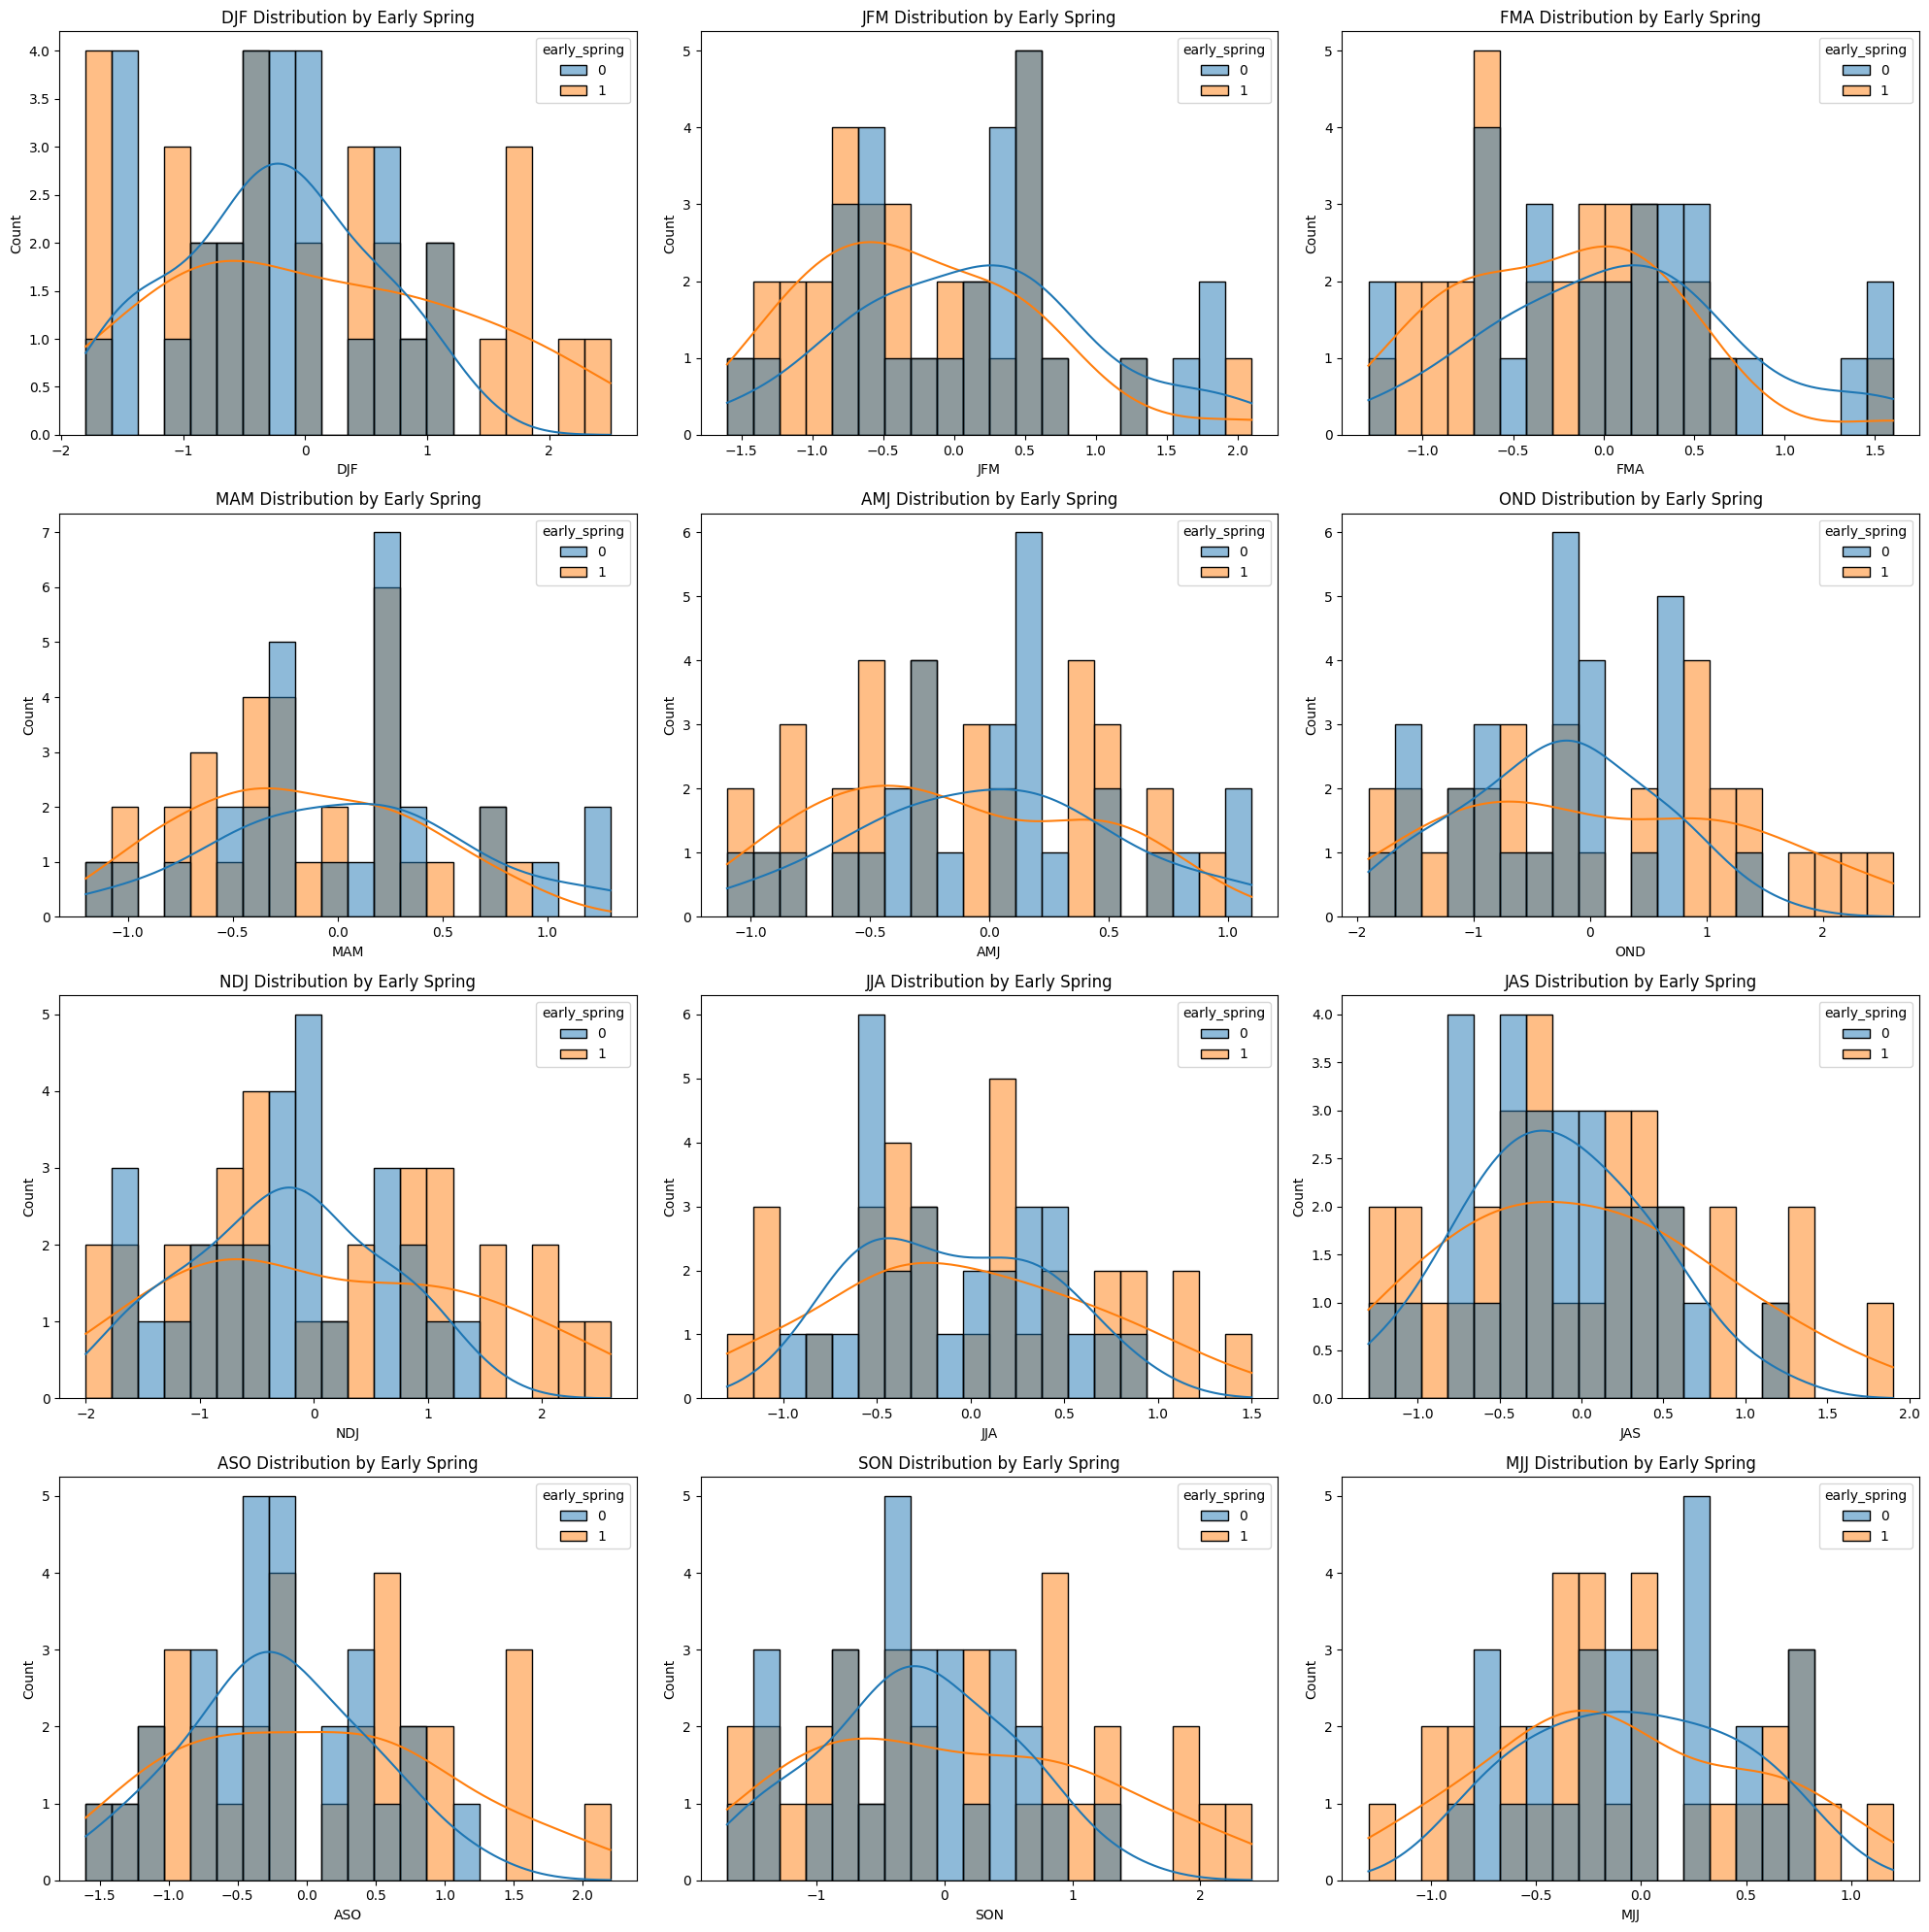

In [995]:
plt.figure(figsize=(20, 20))

# Create a 4x4 grid of histograms
fig, axes = plt.subplots(4, 3, figsize=(20, 20))
axes = axes.flatten()

# Plot histograms for seasonal features and compare with early_spring as hue
seasonal_features = ['DJF', 'JFM', 'FMA', 'MAM', 'AMJ', 'OND', 'NDJ', 'JJA', 'JAS', 'ASO', 'SON', 'MJJ']
for i, feature in enumerate(seasonal_features):
    sns.histplot(data=combined_data, x=feature, hue='early_spring', kde=True, bins=20, ax=axes[i])
    axes[i].set_title(f'{feature} Distribution by Early Spring')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### Seasonal Features with Early Spring:

1. **DJF (December-January-February) Distribution:**
   - The early_spring occurrences (orange hue) show a broad distribution across DJF values, with a slight peak in the positive range of the DJF feature. This indicates that higher DJF values slightly increase the likelihood of early spring.

2. **JFM (January-February-March) Distribution:**
   - Both early_spring and non-early_spring values are distributed relatively evenly across the JFM feature. The overlap suggests that JFM may not be a highly discriminative feature for predicting early spring.

3. **FMA (February-March-April) Distribution:**
   - Early spring is more frequent for higher FMA values, whereas lower values correspond more to non-early_spring. This indicates a positive association between higher FMA values and the likelihood of early spring.

4. **MAM (March-April-May) Distribution:**
   - The feature displays a more spread distribution for both early_spring and non-early_spring, showing some indication that higher MAM values might have more early_spring occurrences.

5. **AMJ (April-May-June) Distribution:**
   - Similar to MAM, the spread of early_spring occurrences shows a wider distribution, suggesting that AMJ is not highly predictive of early spring but still worth considering in relation to other features.

6. **OND (October-November-December) Distribution:**
   - OND seems to show an even distribution across early_spring and non-early_spring values, indicating it may not be a strong feature for discriminating between early spring and non-early spring years.

7. **NDJ, JJA, JAS, ASO, SON, MJJ Distributions:**
   - These features show mixed results, with no particularly strong trends emerging in relation to early_spring occurrences. Most of these months appear to have a mix of early_spring and non-early_spring occurrences without a clear separation in their distributions.

### Summary:
- **FMA** and **DJF** show more promise as useful seasonal indicators for early spring occurrences, with FMA showing a positive association with early spring.
- Other seasonal features such as **JFM**, **MAM**, and **AMJ** show some spread but are less distinct in predicting early spring occurrences.


In [996]:
print(combined_data['Precipitation'].describe())


count    63.000000
mean      0.104722
std       0.234812
min       0.000000
25%       0.000000
50%       0.010000
75%       0.110000
max       1.580000
Name: Precipitation, dtype: float64


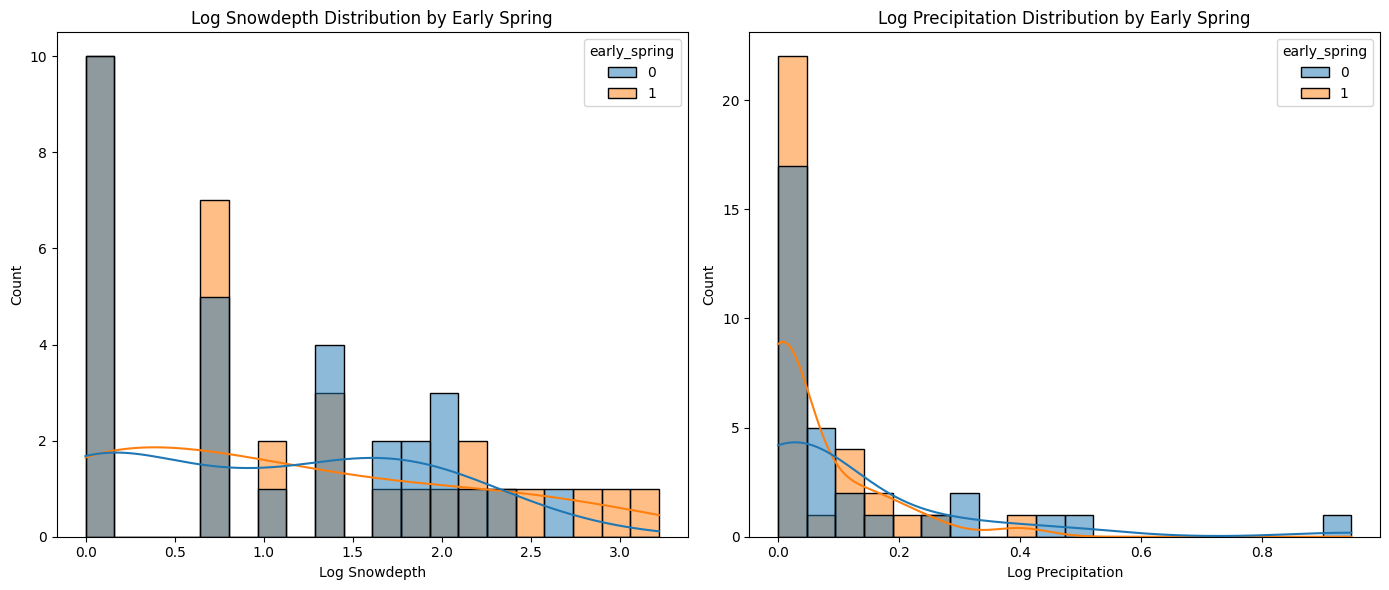

In [997]:
combined_data['log_snowdepth'] = np.log1p(combined_data['Snowdepth']) 
combined_data['log_precipitation'] = np.log1p(combined_data['Precipitation'])

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot Log Snowdepth Distribution by Early Spring
sns.histplot(data=combined_data, x='log_snowdepth', hue='early_spring', kde=True, bins=20, ax=axes[0])
axes[0].set_title('Log Snowdepth Distribution by Early Spring')
axes[0].set_xlabel('Log Snowdepth')
axes[0].set_ylabel('Count')

# Plot Log Precipitation Distribution by Early Spring
sns.histplot(data=combined_data, x='log_precipitation', hue='early_spring', kde=True, bins=20, ax=axes[1])
axes[1].set_title('Log Precipitation Distribution by Early Spring')
axes[1].set_xlabel('Log Precipitation')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

### Snowdepth and Precipitation
Both features (snow depth and precipitation) exhibit weak relationships with early_spring, as indicated by their distributions. The bulk of both distributions cluster around low values (0), and while there are some slight trends, they are not strong predictors on their own. Further exploration in combination with other variables might reveal more significant insights.

### Feature Importances (Random Forest):

In [998]:
#show all rows



feature_importances_df

feature  importance
371     mean_soil_temp_36    0.013644
52            max_temp_53    0.011507
388     mean_soil_temp_53    0.011100
282           snowdepth_3    0.010803
539  min_soil_moisture_36    0.009819
..                    ...         ...
4              max_temp_5    0.000000
14            max_temp_15    0.000000
13            max_temp_14    0.000000
641  max_soil_moisture_26    0.000000
3              max_temp_4    0.000000

[684 rows x 2 columns]

1. **Top Features**: 
   - `mean_soil_temp_36` has the highest importance with a value of 0.0136, indicating that it plays the most significant role in predicting the target variable (`early_spring`).
   - Other relatively important features include `max_temp_53` (0.0115), `mean_soil_temp_53` (0.0111), and `snowdepth_3` (0.0108).
   
2. **Low-Importance Features**: 
   - Many features have an importance of 0, indicating they contribute little or nothing to the model’s prediction. Examples include `mean_soil_temp_31`, `min_temp_44`, and `min_soil_moisture_7`.
   
3. **Actionable Steps**: 
   - Any features with a 0 or extremely close to zero will be dropped from the model as they show little to no importance to the outcome of the model. 

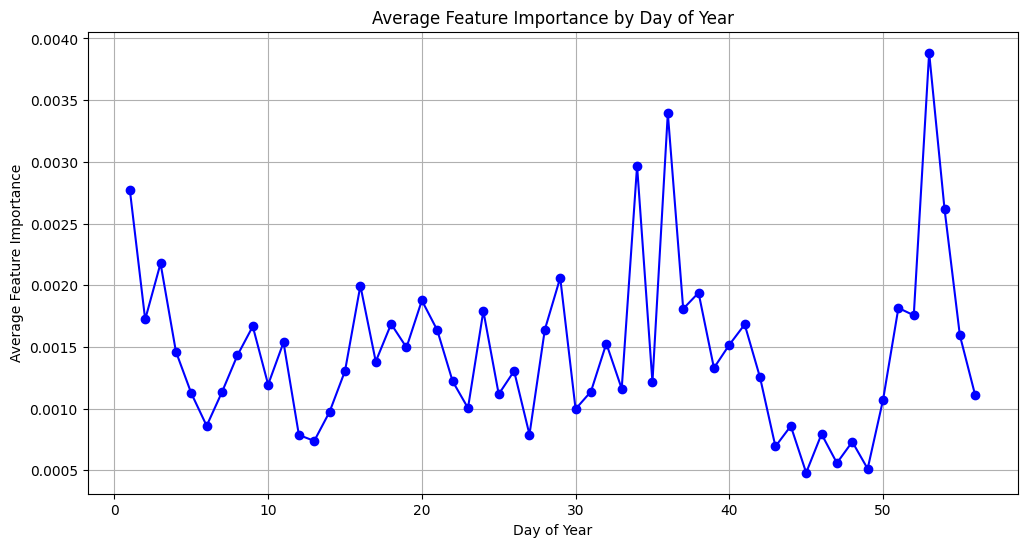

In [999]:
# Filter out non-numeric feature names and create a copy to avoid SettingWithCopyWarning
numeric_features = feature_importances_df[feature_importances_df['feature'].str.split('_').str[-1].str.isnumeric()].copy()

# Extract day information from feature names
numeric_features['day'] = numeric_features['feature'].apply(lambda x: int(x.split('_')[-1]))

# Group by 'day' and calculate the average importance for each day
day_importance = numeric_features.groupby('day')['importance'].mean().reset_index()

# Plot feature importance by day
plt.figure(figsize=(12, 6))
plt.plot(day_importance['day'], day_importance['importance'], marker='o', linestyle='-', color='b')
plt.xlabel('Day of Year')
plt.ylabel('Average Feature Importance')
plt.title('Average Feature Importance by Day of Year')
plt.grid(True)
plt.show()


The graph of "Average Feature Importance by Day of Year" shows how the importance of features varies by day. Key insights from the graph:

- There are significant peaks in feature importance around days 34, 36, 54, etc., which suggests that some of the variables corresponding to these days play a larger role in predicting early spring.
- The overall trend fluctuates, with a few sharp increases and decreases in importance, indicating that not all days are equally informative.
- Days with low importance, especially around days 43 to 49, may indicate that features for those days contribute minimally and could potentially be deprioritized or dropped in further modeling.

Since the graph represents the average feature importance across all the days, it indicates that while some days have higher importance than others, this doesn't mean that *every* day is equally important. However, the overall pattern suggests that the day of the year as a feature plays a significant role in predicting the target label (early spring), with certain periods of the year standing out as more influential. 

This highlights that, while some days may not individually be as important, collectively, days across the year can be a key factor in the model’s performance.

<Axes: xlabel='max_temp_1', ylabel='Count'>

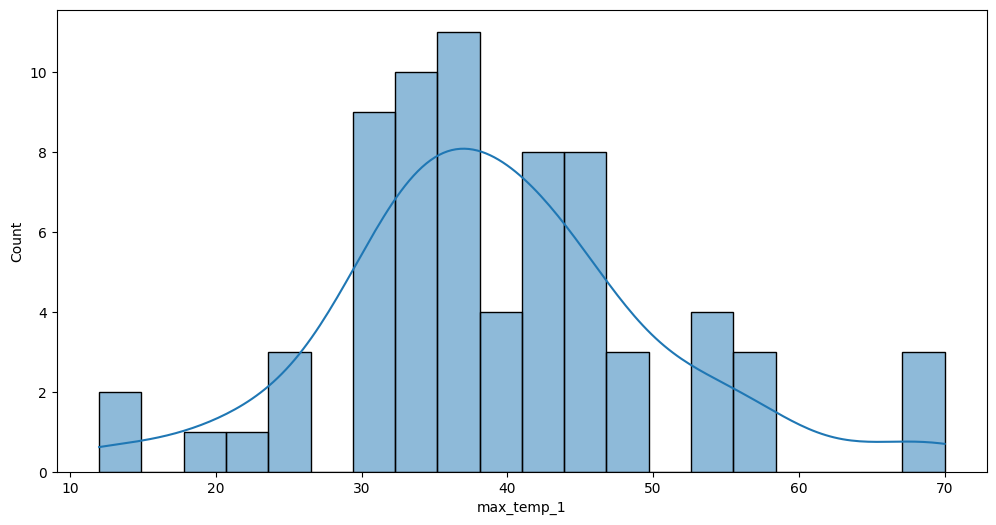

In [1000]:
#histogram of max temp on jan 1st

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(data['max_temp_1'], bins=20, kde=True)

<Axes: xlabel='max_temp_32', ylabel='Count'>

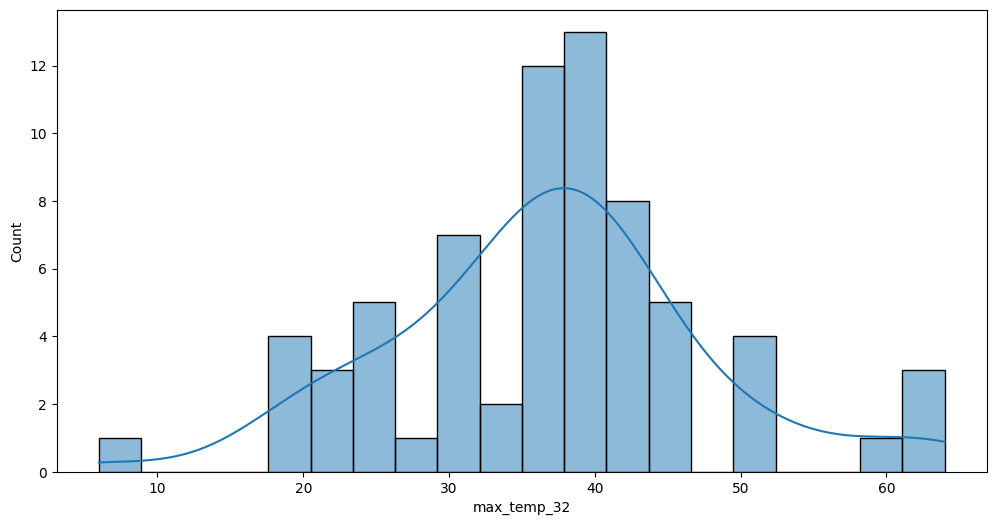

In [1001]:
#histogram of max temp on feb 1st

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(data['max_temp_32'], bins=20, kde=True)

<Axes: xlabel='max_temp_56', ylabel='Count'>

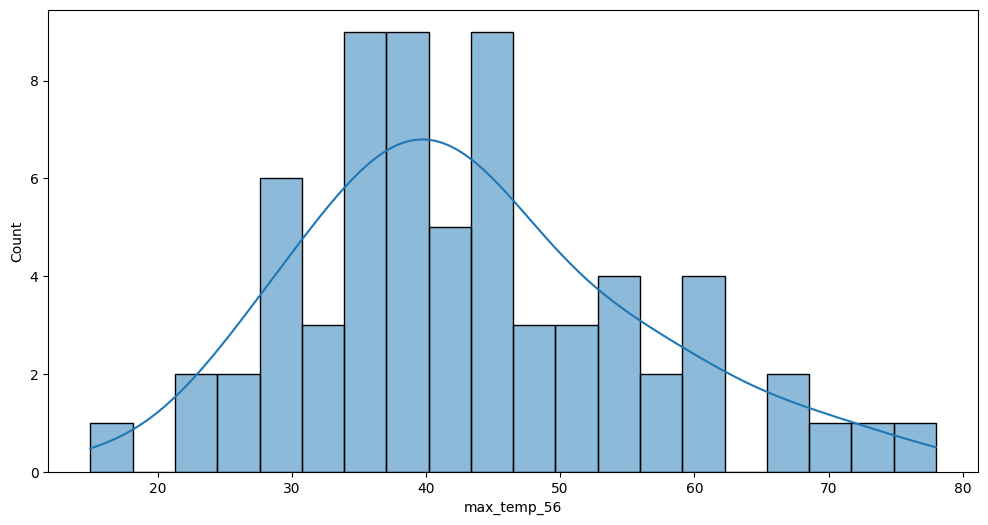

In [1002]:
#histogram of max temp on feb 25th

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(data['max_temp_56'], bins=20, kde=True)

<Axes: xlabel='precipitation_1', ylabel='Count'>

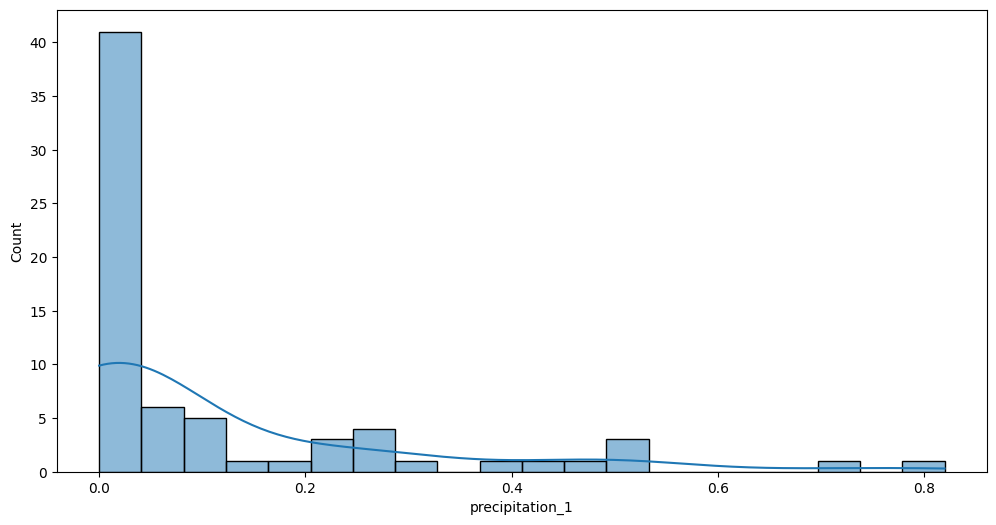

In [1003]:
#histogram of precipitation jan 1

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(data['precipitation_1'], bins=20, kde=True)

In [1004]:
#log all precipitation values and add them to the train data

train_data['log_precipitation_1'] = np.log1p(train_data['precipitation_1'])


<Axes: xlabel='log_precipitation_1', ylabel='Count'>

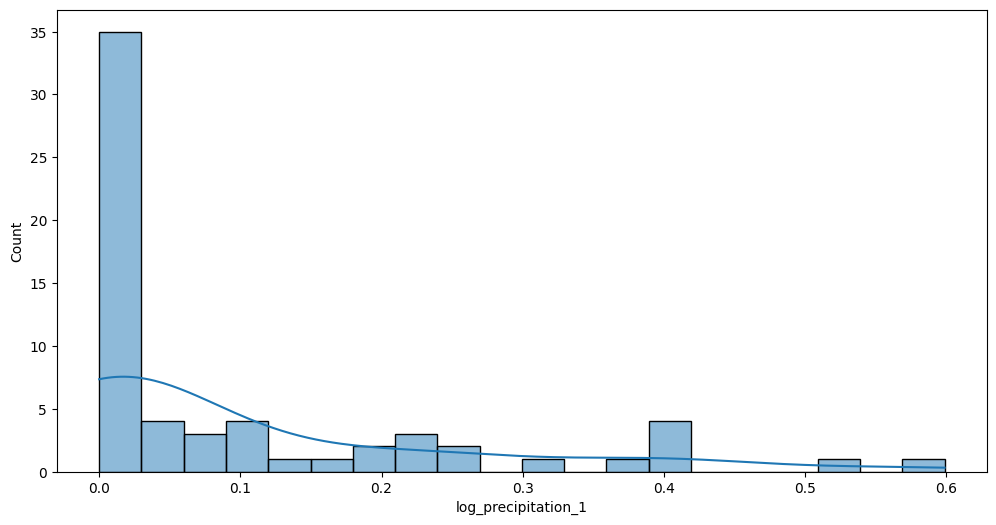

In [1005]:
#histogram of log precipitation 1

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(train_data['log_precipitation_1'], bins=20, kde=True)

<Axes: >

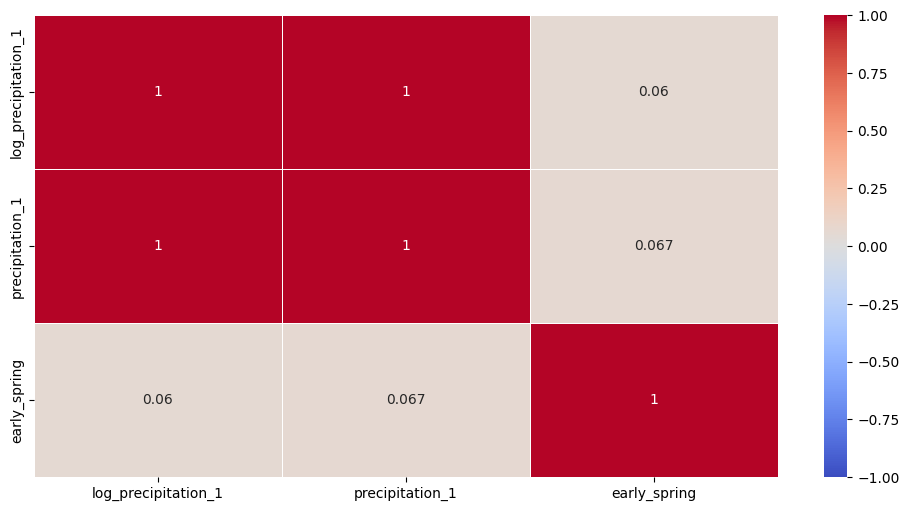

In [1006]:
# see correlation between log precipitation 1, precipitation 1 and early spring

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# create corr matrix

corr_matrix = train_data[['log_precipitation_1', 'precipitation_1', 'early_spring']]

# Create the heatmap
sns.heatmap(corr_matrix.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)

Interestingly Precipitation_1 has more correlation than log_precipitation_1 despite looking log normal in our earlier analysis.

<Axes: xlabel='log_precipitation', ylabel='Count'>

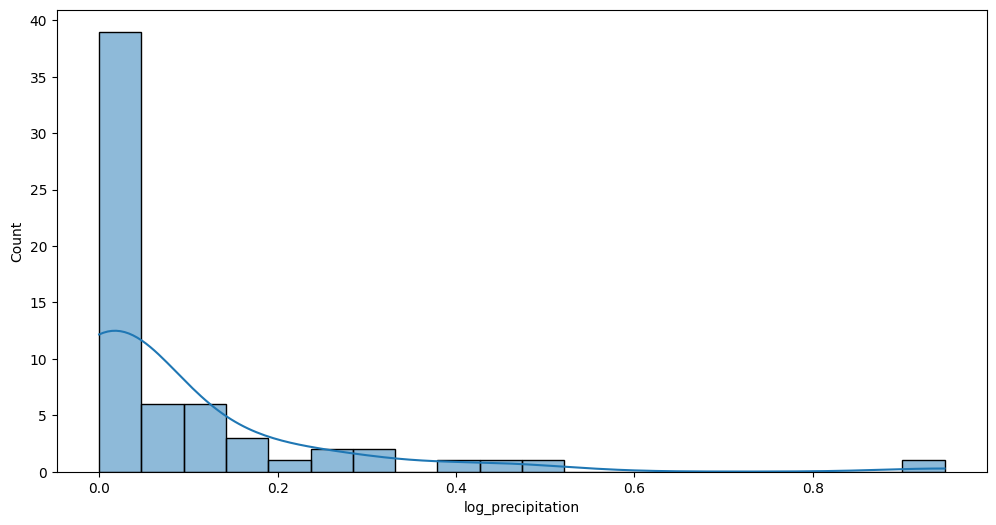

In [1007]:
#log precipitation from combined data
combined_data['log_precipitation'] = np.log1p(combined_data['Precipitation'])

#histogram of log precipitation

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(combined_data['log_precipitation'], bins=20, kde=True)

<Axes: >

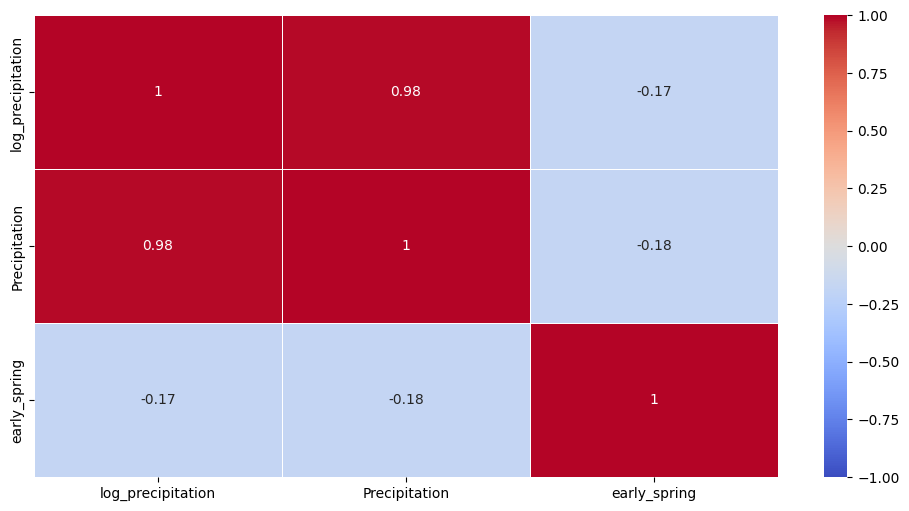

In [1008]:
#corr matrix of log precipitation, precipitation and early spring

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# create corr matrix

corr_matrix = combined_data[['log_precipitation', 'Precipitation', 'early_spring']]

# Create the heatmap
sns.heatmap(corr_matrix.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)

Same for all Precipitation days

<Axes: xlabel='snowdepth_1', ylabel='Count'>

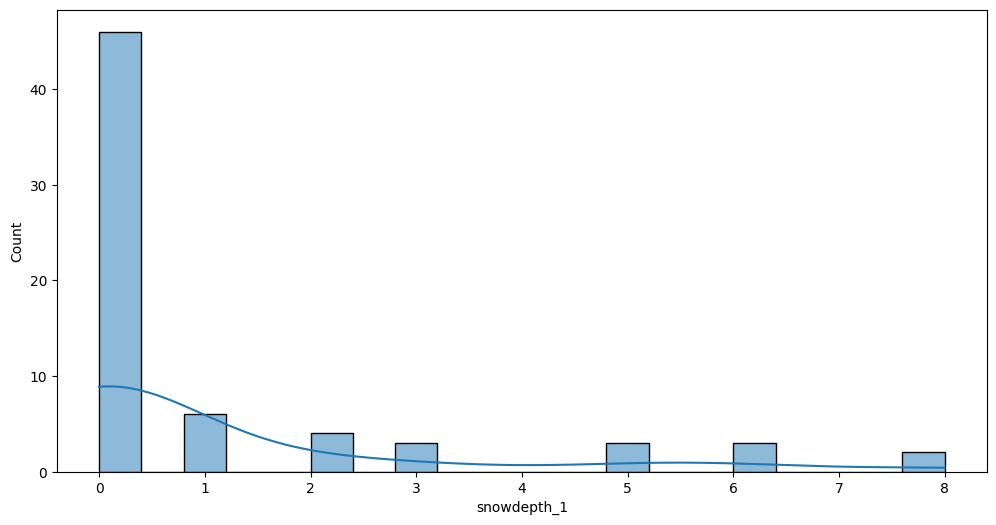

In [1009]:
# hist of snowdepth on jan 1st

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(data['snowdepth_1'], bins=20, kde=True)



In [1010]:
# create log snowdepth 1

# log snowdepth 1 and add it to train data
train_data['log_snowdepth_1'] = np.log1p(train_data['snowdepth_1'])


<Axes: xlabel='log_snowdepth_1', ylabel='Count'>

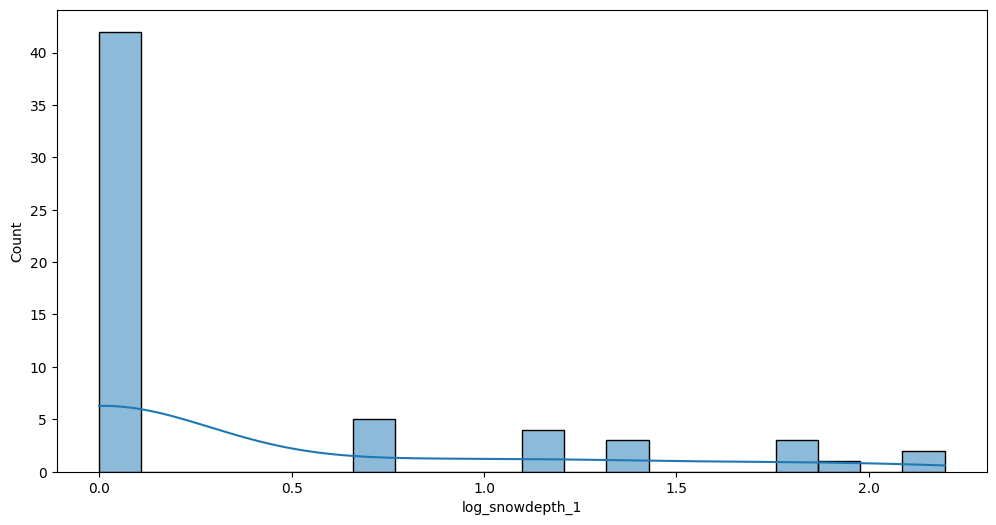

In [1011]:
# hist of log snowdepth 1

# Set the figure size for better readability

plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(train_data['log_snowdepth_1'], bins=20, kde=True)


<Axes: >

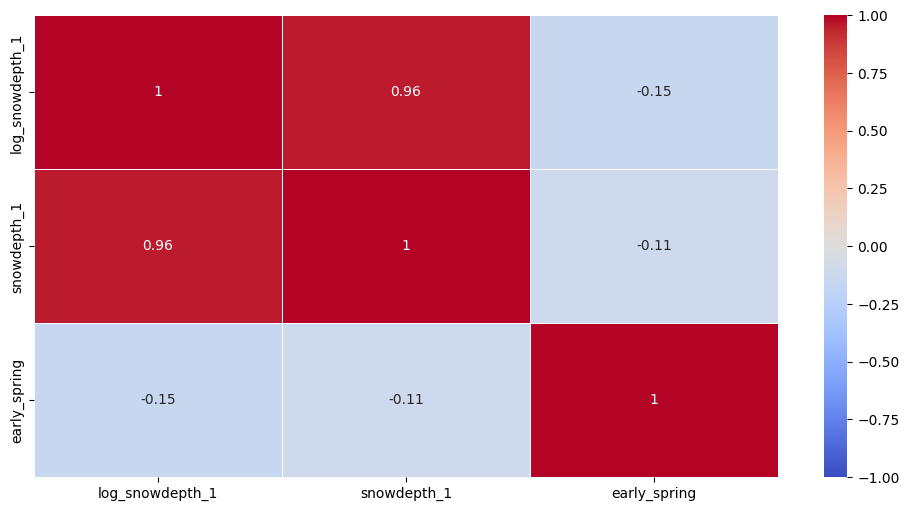

In [1012]:
# corr matrix of log snowdepth 1, snowdepth 1 and early spring

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# create corr matrix
corr_matrix = train_data[['log_snowdepth_1', 'snowdepth_1', 'early_spring']]

# Create the heatmap
sns.heatmap(corr_matrix.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)

Yooooooo I see some changes. Will now try logging all of snow depth

<Axes: xlabel='Snowdepth', ylabel='Count'>

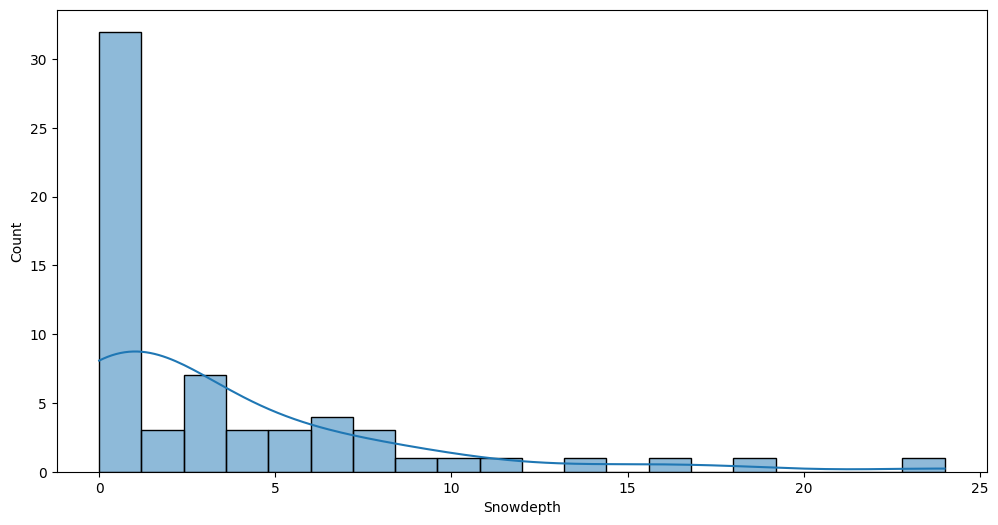

In [1013]:
#hist of snowdepth

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(combined_data['Snowdepth'], bins=20, kde=True)

<Axes: xlabel='log_snowdepth', ylabel='Count'>

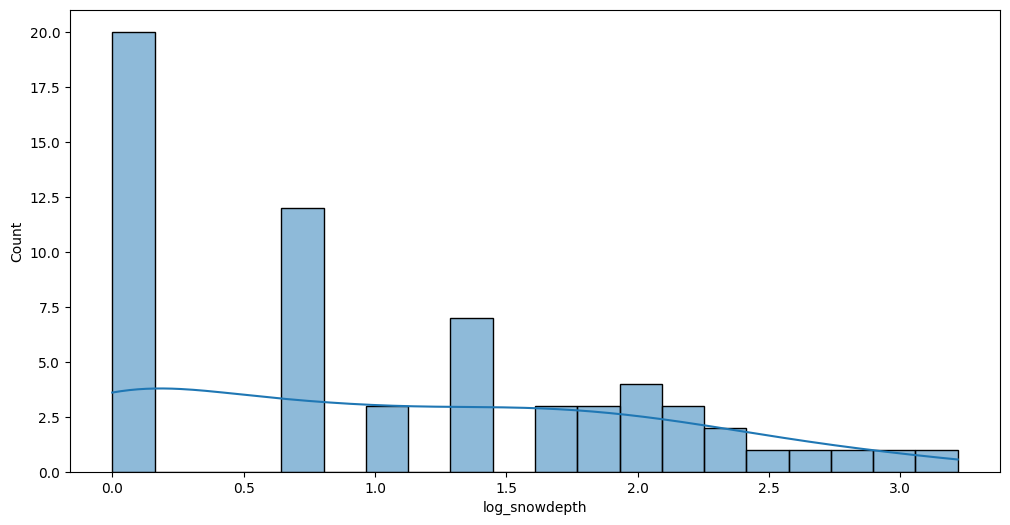

In [1014]:
# log snowdepth from combined data

combined_data['log_snowdepth'] = np.log1p(combined_data['Snowdepth'])

# hist of log snowdepth

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(combined_data['log_snowdepth'], bins=20, kde=True)

<Axes: >

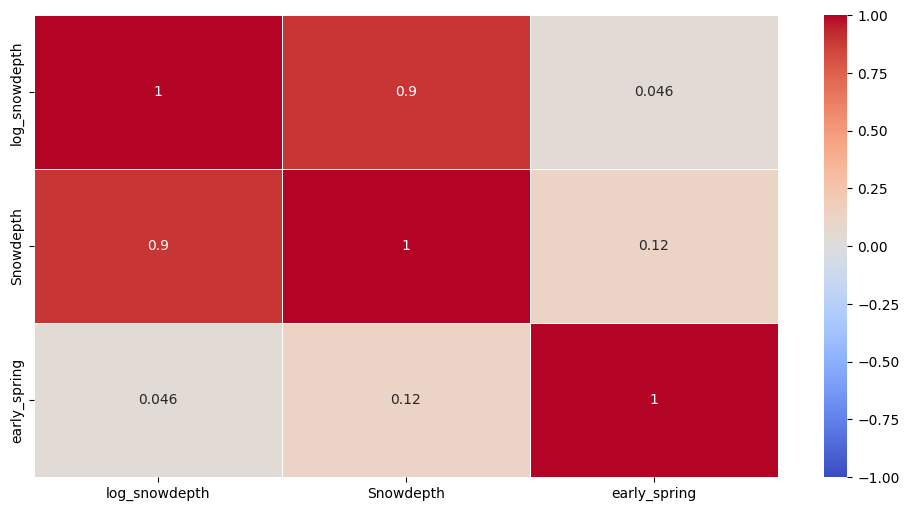

In [1015]:
# corr matrix of log snowdepth, snowdepth and early spring

# Set the figure size for better readability

plt.figure(figsize=(12, 6))

# create corr matrix
corr_matrix = combined_data[['log_snowdepth', 'Snowdepth', 'early_spring']]

# Create the heatmap
sns.heatmap(corr_matrix.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)

Hmmmmmm less correlation. Makes me think that there could be a trend. Will try to split it up by months next.

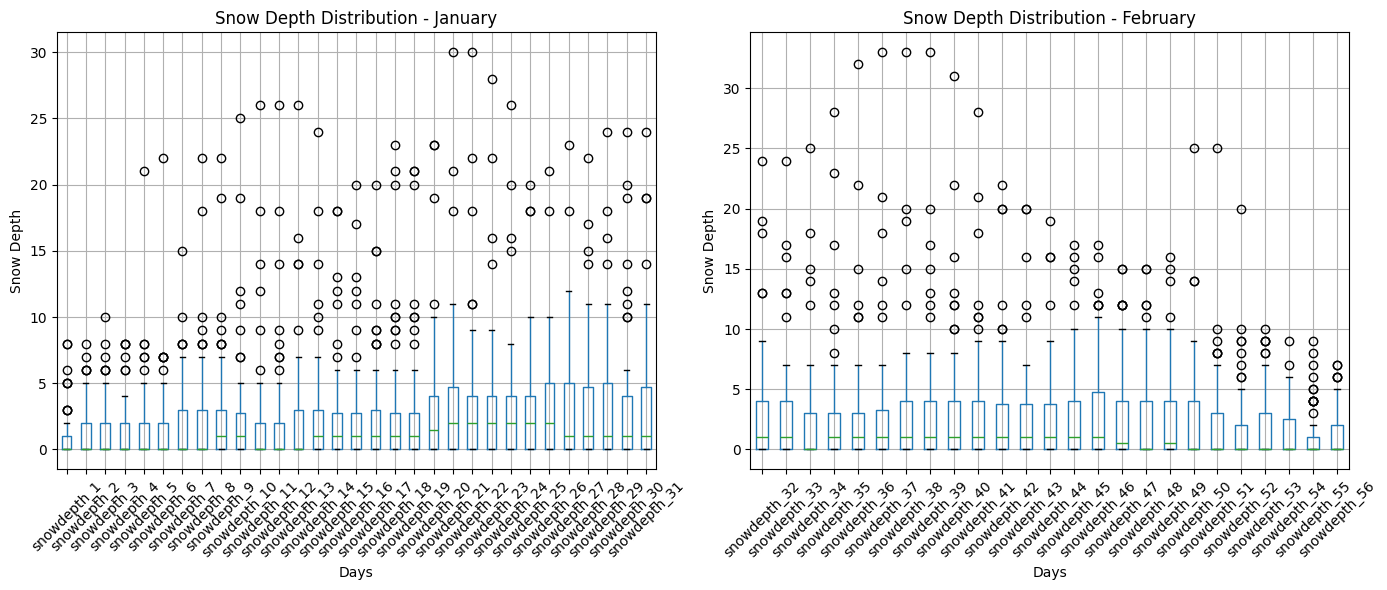

In [1016]:
snow_depth_cols = [f'snowdepth_{i}' for i in range(1, 57)]
snow_depth_df = train_data[snow_depth_cols]

january_depths = snow_depth_df.iloc[:, 0:31]  # Days 1-31
february_depths = snow_depth_df.iloc[:, 31:56]  # Days 32-56


# Box plots
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
january_depths.boxplot()
plt.title('Snow Depth Distribution - January')
plt.xlabel('Days')
plt.ylabel('Snow Depth')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
february_depths.boxplot()
plt.title('Snow Depth Distribution - February')
plt.xlabel('Days')
plt.ylabel('Snow Depth')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Very interesting. It looks as if we get less snow during the first days of janurary and the end of Februrary

<Axes: >

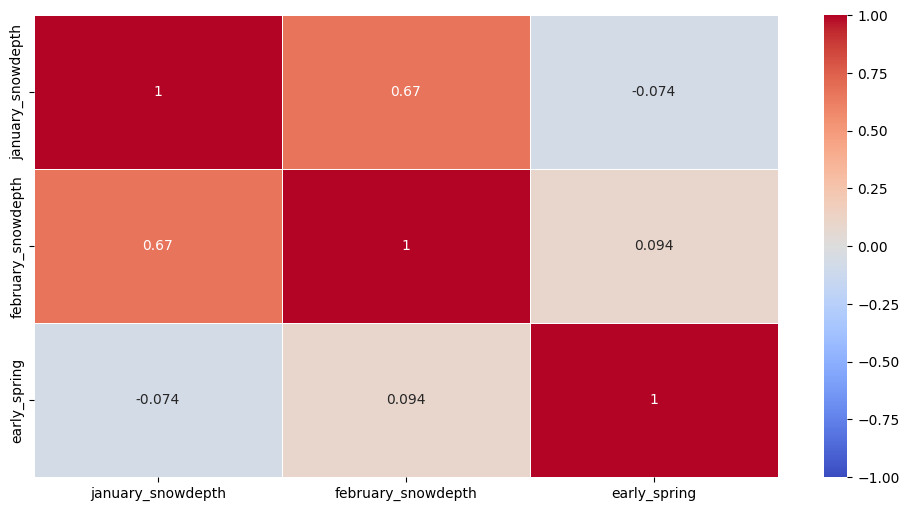

In [1017]:
# corr matrix of combined jan snowdepths, and combined feb snowdepths, and early spring

#add snowdepth columns to combined data
combined_data[snow_depth_cols] = data[snow_depth_cols]

#combine first 31 days of snowdepth and last 25 days of snowdepth

combined_data['january_snowdepth'] = combined_data[snow_depth_cols[:31]].sum(axis=1)
combined_data['february_snowdepth'] = combined_data[snow_depth_cols[31:56]].sum(axis=1)


# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# create corr matrix

corr_matrix = combined_data[['january_snowdepth', 'february_snowdepth', 'early_spring']]

# Create the heatmap
sns.heatmap(corr_matrix.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)

<Axes: xlabel='january_snowdepth', ylabel='Count'>

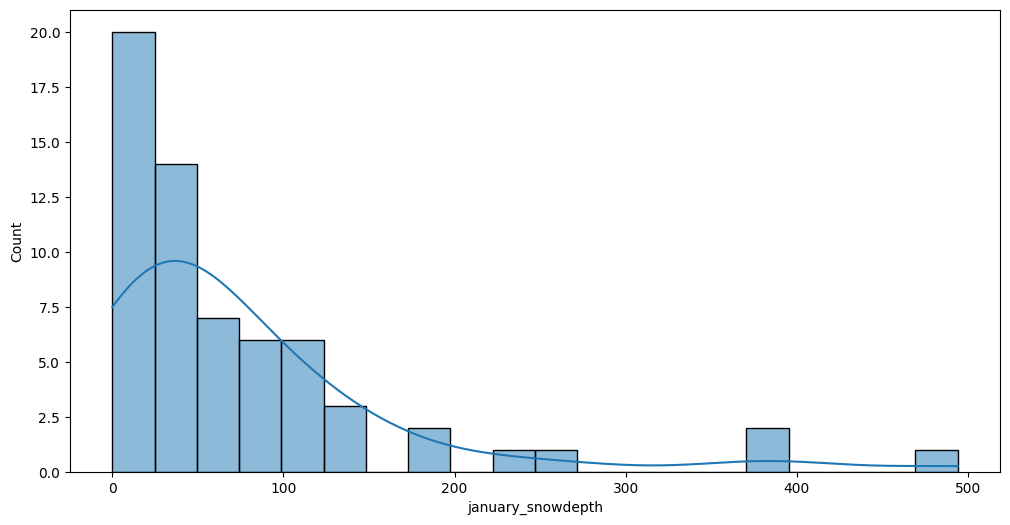

In [1018]:
#plot january snowdepth

# Set the figure size for better readability

plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(combined_data['january_snowdepth'], bins=20, kde=True)

<Axes: xlabel='february_snowdepth', ylabel='Count'>

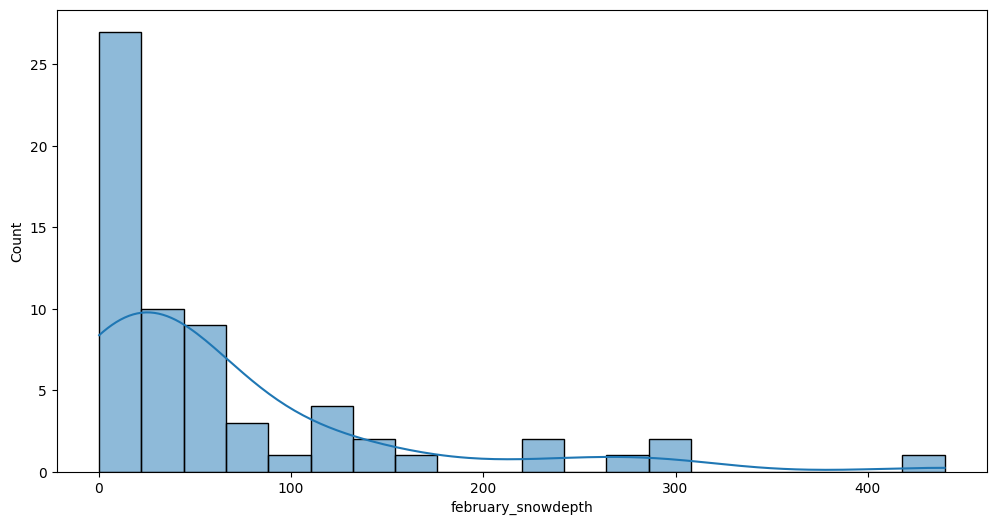

In [1019]:
#plot february snowdepth

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(combined_data['february_snowdepth'], bins=20, kde=True)

<Axes: >

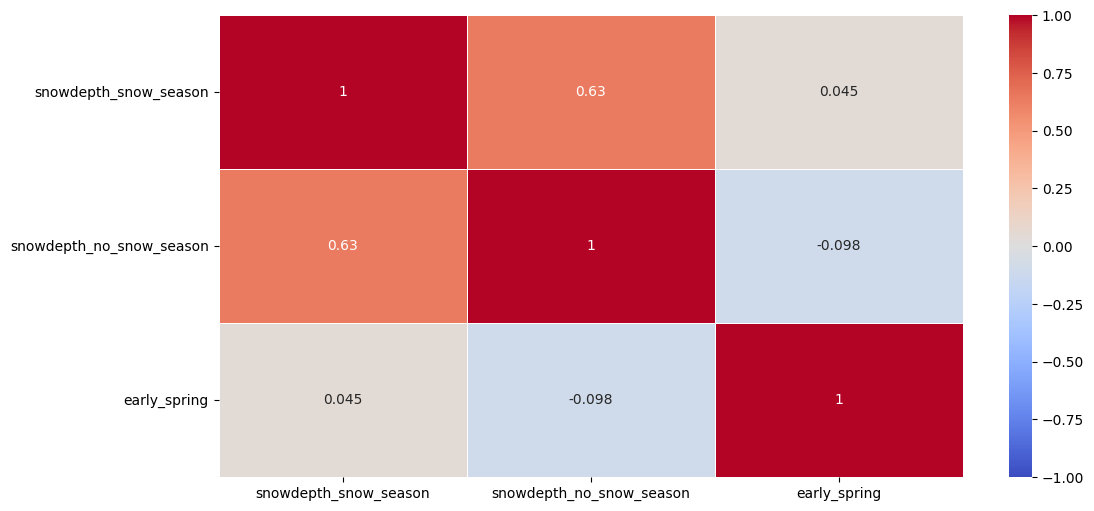

In [1020]:
# break up middle 50% of snowdepths into "snowdepth_snow_season" and "snowdepth_no_snow_season"

#make day 9-day 42 snowdepths into snowdepth_snow_season

combined_data['snowdepth_snow_season'] = combined_data[snow_depth_cols[8:42]].sum(axis=1)

#make day 1-8 and day 43-56 snowdepths into snowdepth_no_snow_season

combined_data['snowdepth_no_snow_season'] = combined_data[snow_depth_cols[:8] + snow_depth_cols[42:56]].sum(axis=1)

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# create corr matrix

corr_matrix = combined_data[['snowdepth_snow_season', 'snowdepth_no_snow_season', 'early_spring']]

# Create the heatmap
sns.heatmap(corr_matrix.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)



<Axes: >

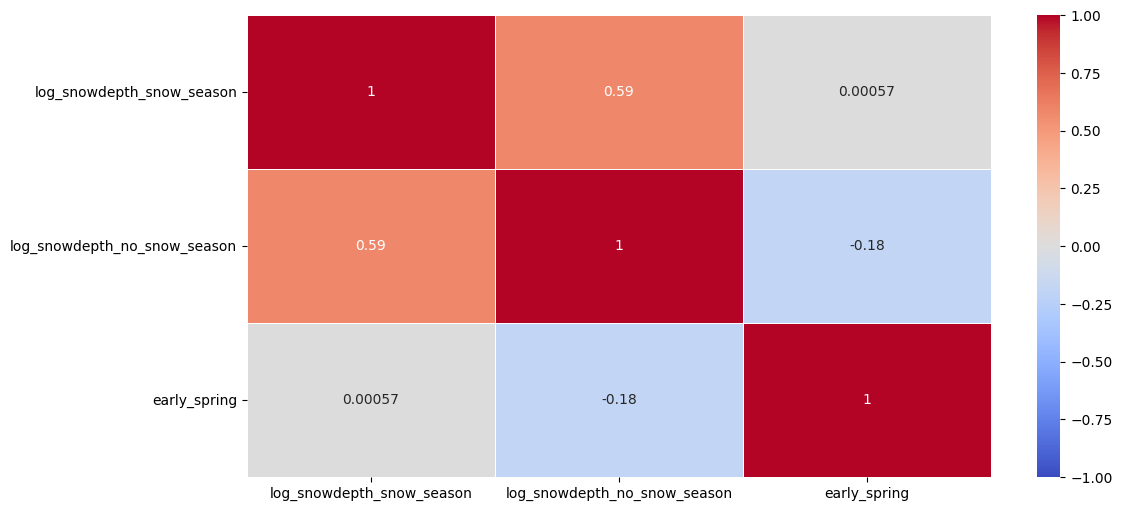

In [1021]:
# log both snowdepths

combined_data['log_snowdepth_snow_season'] = np.log1p(combined_data['snowdepth_snow_season'])

combined_data['log_snowdepth_no_snow_season'] = np.log1p(combined_data['snowdepth_no_snow_season'])

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the correlation matrix

corr_matrix = combined_data[['log_snowdepth_snow_season', 'log_snowdepth_no_snow_season', 'early_spring']]

# Create the heatmap
sns.heatmap(corr_matrix.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)

HUUUUUUUGE JUMP

<Axes: xlabel='log_snowdepth_snow_season', ylabel='Count'>

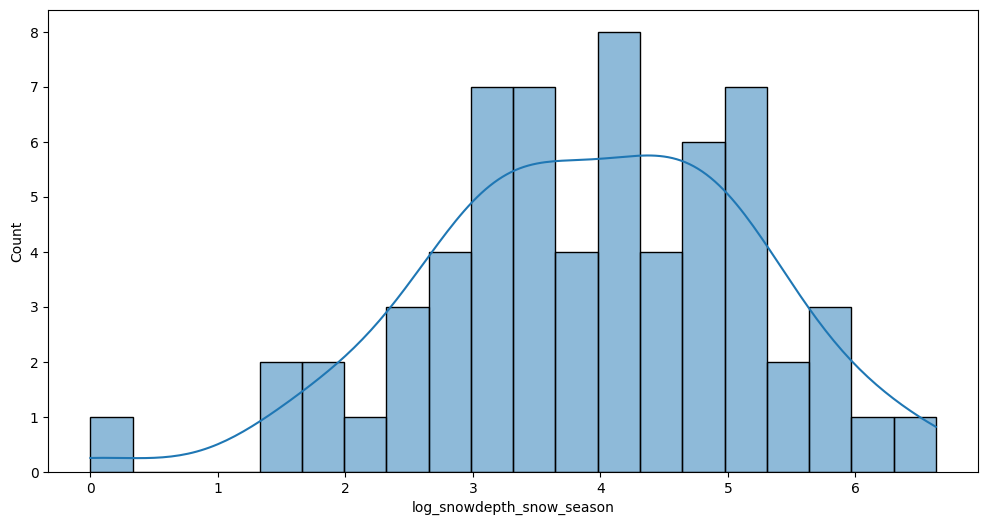

In [1022]:
#histogram of log snowdepth snow season

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(combined_data['log_snowdepth_snow_season'], bins=20, kde=True)

<Axes: xlabel='snowdepth_no_snow_season', ylabel='Count'>

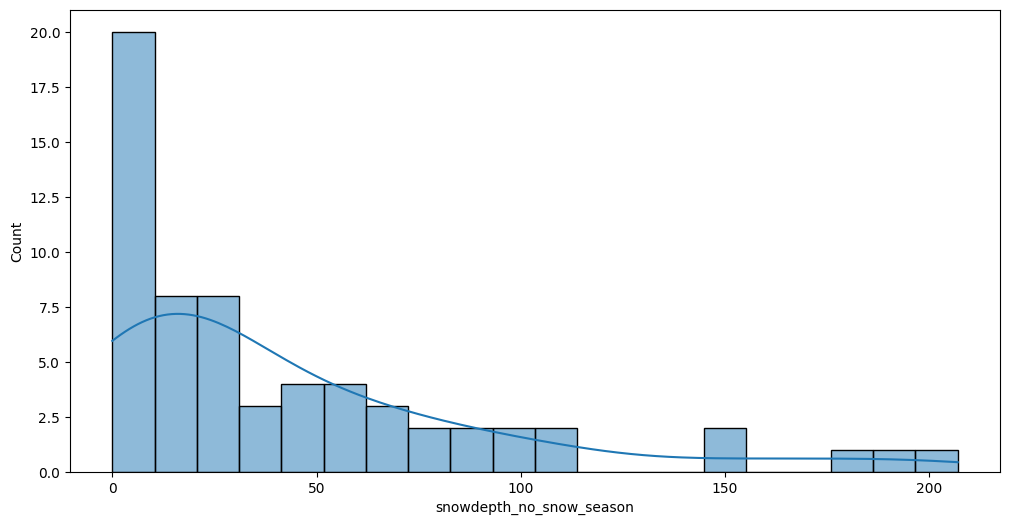

In [1023]:
#histogram of snowdepth no snow season

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(combined_data['snowdepth_no_snow_season'], bins=20, kde=True)

<Axes: xlabel='log_snowdepth_no_snow_season', ylabel='Count'>

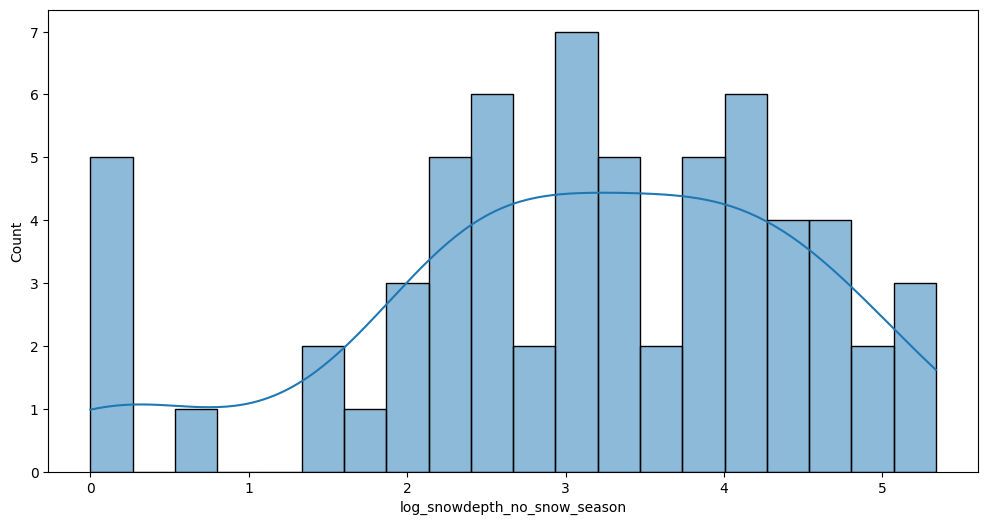

In [1024]:
# histogram of log snowdepth no snow season

# Set the figure size for better readability

plt.figure(figsize=(12, 6))

# Create the histogram

sns.histplot(combined_data['log_snowdepth_no_snow_season'], bins=20, kde=True)


<Axes: xlabel='snowdepth_56', ylabel='Count'>

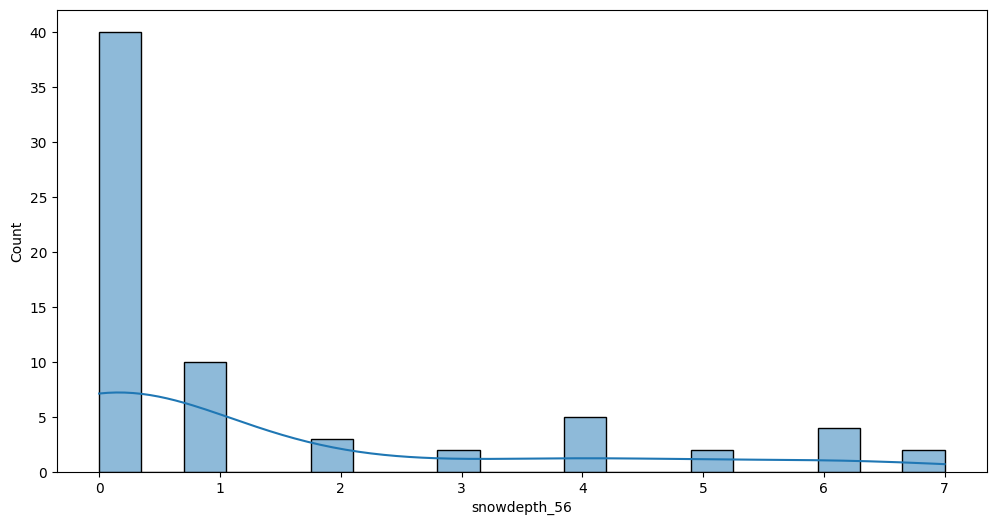

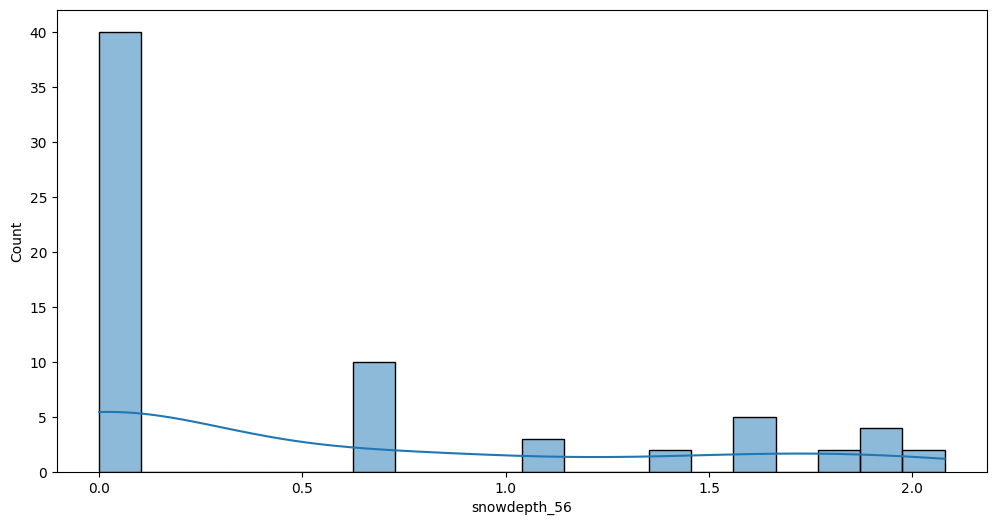

In [1025]:
#snowdepth feb 25

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(data['snowdepth_56'], bins=20, kde=True)

#log snowdepth 25

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(np.log1p(data['snowdepth_56']), bins=20, kde=True)

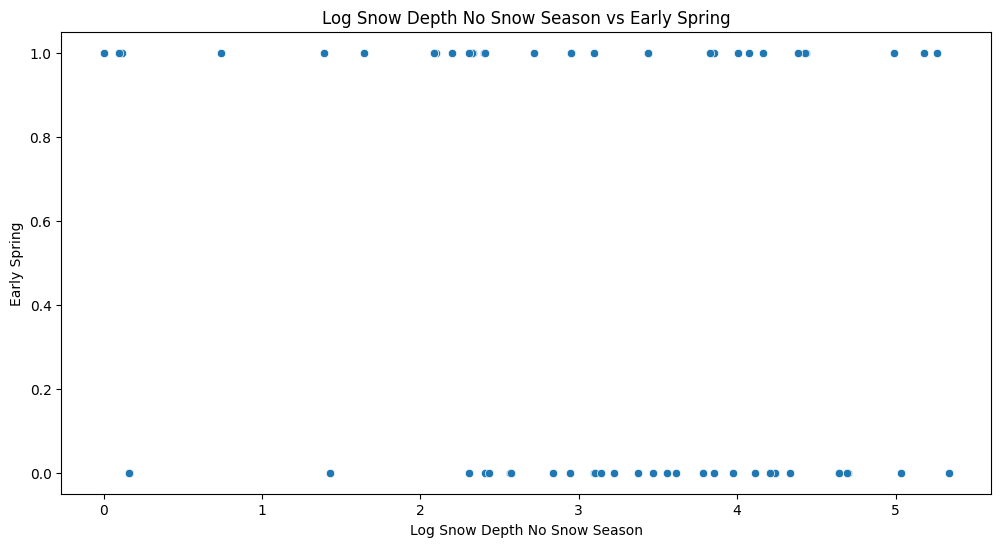

In [1026]:
#scatterplot of log snowdepth no snow season and early spring

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the scatter plot
sns.scatterplot(data=combined_data, x='log_snowdepth_no_snow_season', y='early_spring')
plt.title('Log Snow Depth No Snow Season vs Early Spring')
plt.xlabel('Log Snow Depth No Snow Season')
plt.ylabel('Early Spring')
plt.show()


In [1027]:
train_data

max_temp_1  max_temp_2  max_temp_3  max_temp_4  max_temp_5  max_temp_6  \
year                                                                           
2020        39.0        37.0        49.0        50.0        47.0        37.0   
1973        56.0        37.0        40.0        52.0        39.0        29.0   
1947        30.0        44.0        54.0        42.0        33.0        33.0   
1993        43.0        38.0        41.0        66.0        64.0        36.0   
1952        68.0        52.0        39.0        36.0        39.0        32.0   
...          ...         ...         ...         ...         ...         ...   
1961        36.0        32.0        29.0        24.0        40.0        45.0   
2016        36.0        33.0        33.0        32.0        25.0        28.0   
1964        31.0        34.0        50.0        46.0        43.0        41.0   
1965        36.0        53.0        34.0        30.0        44.0        42.0   
1974        35.0        28.0        34.0        32.0        34.0        30.0   

      max_temp_7  max_temp_8  max_temp_9  max_temp_10  max_temp_11  \
year                                                                 
2020        41.0        34.0        33.0         39.0         53.0   
1973        19.0        19.0        23.0         21.0         26.0   
1947        34.0        35.0        31.0         30.0         49.0   
1993        42.0        37.0        35.0         31.0         37.0   
1952        32.0        35.0        48.0         36.0         31.0   
...          ...         ...         ...          ...          ...   
1961        47.0        43.0        25.0         36.0         44.0   
2016        41.0        46.0        44.0         56.0         48.0   
1964        40.0        41.0        47.0         43.0         28.0   
1965        49.0        59.0        60.0         33.0         31.0   
1974        30.0        25.0        39.0         37.0         40.0   

      max_temp_12  max_temp_13  max_temp_14  max_temp_15  max_temp_16  \
year                                                                    
2020         69.0         53.0         50.0         54.0         55.0   
1973         24.0         35.0         40.0         38.0         42.0   
1947         47.0         40.0         50.0         50.0         51.0   
1993         46.0         51.0          NaN         31.0         31.0   
1952         43.0         36.0         55.0         63.0         53.0   
...           ...          ...          ...          ...          ...   
1961         45.0         51.0         51.0         39.0         40.0   
2016         27.0         30.0         27.0         41.0         49.0   
1964         18.0         16.0         15.0         25.0         33.0   
1965         36.0         36.0         31.0         19.0         21.0   
1974         27.0         24.0         40.0         50.0         54.0   

      max_temp_17  max_temp_18  max_temp_19  max_temp_20  max_temp_21  \
year                                                                    
2020         38.0         28.0         47.0         28.0         26.0   
1973         57.0         62.0         50.0         39.0         47.0   
1947         49.0         42.0         44.0         54.0         46.0   
1993         33.0         31.0         31.0         41.0         40.0   
1952         58.0         58.0         38.0         56.0         35.0   
...           ...          ...          ...          ...          ...   
1961         38.0         36.0         31.0         18.0         18.0   
2016         40.0         30.0         12.0         16.0         24.0   
1964         36.0         42.0         45.0         44.0         46.0   
1965         14.0         20.0         23.0         33.0         36.0   
1974         46.0         45.0         51.0         52.0         54.0   

      max_temp_22  max_temp_23  max_temp_24  max_temp_25  max_temp_26  \
year                                                                    
2020    

# Summary



# Data Prep

### GOALS FOR TRANSFORMATION

- Drop unneccecary columns
- Impute Data
- Scale Data

In [1028]:
#split the target label from the train data
train_data_copy = train_data.copy()
y = train_data_copy.pop("early_spring")
X = train_data_copy

In [1029]:
#find all features with 0 importance
zero_importance_features = feature_importances_df[feature_importances_df['importance'] == 0]

# Display the features with 0 importance
zero_importance_features

feature  importance
377     mean_soil_temp_42         0.0
375     mean_soil_temp_40         0.0
86            min_temp_31         0.0
667  max_soil_moisture_52         0.0
78            min_temp_23         0.0
..                    ...         ...
4              max_temp_5         0.0
14            max_temp_15         0.0
13            max_temp_14         0.0
641  max_soil_moisture_26         0.0
3              max_temp_4         0.0

[258 rows x 2 columns]

In [1030]:
imputation_results = test_imputation_methods(train_data, 'early_spring')
print(imputation_results)

{'Mean': {'Accuracy': 0.5384615384615384, 'F1 Score': np.float64(0.5)}, 'Median': {'Accuracy': 0.5384615384615384, 'F1 Score': np.float64(0.5)}, 'Mode': {'Accuracy': 0.5384615384615384, 'F1 Score': np.float64(0.5)}, 'KNN': {'Accuracy': 0.6153846153846154, 'F1 Score': np.float64(0.5454545454545454)}}


c:\Users\skill\Documents\ML\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [1031]:
# Create a ColumnTransformer to drop features with 0 importance
drop_features = ColumnTransformer([
    ('drop', 'drop', zero_importance_features['feature'].values)
], remainder='passthrough')

In [1032]:
preprocessor = Pipeline([
    ('drop_features', drop_features)
])

preprocessor

Pipeline(steps=[('drop_features',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('drop', 'drop',
                                                  array(['mean_soil_temp_42', 'mean_soil_temp_40', 'min_temp_31',
       'max_soil_moisture_52', 'min_temp_23', 'min_temp_52',
       'min_temp_49', 'mean_soil_temp_39', 'mean_soil_temp_35',
       'mean_soil_temp_31', 'mean_soil_temp_50', 'mean_soil_temp_49',
       'mean_soil_temp_48',...
       'min_temp_45', 'min_temp_44', 'max_soil_moisture_46',
       'min_temp_37', 'JJA', 'max_soil_moisture_13', 'MJJ', 'AMJ',
       'max_soil_moisture_9', 'max_soil_moisture_5',
       'max_soil_moisture_35', 'max_soil_moisture_53', 'max_temp_27',
       'max_temp_41', 'snowdepth_33', 'max_temp_17', 'max_temp_5',
       'max_temp_15', 'max_temp_14', 'max_soil_moisture_26', 'max_temp_4'],
      dtype=object))]))])

In [1033]:
X = preprocessor.fit_transform(train_data)

feature_names = preprocessor.get_feature_names_out()  # Get feature names from the preprocessor if available
X_df = pd.DataFrame(X, columns=feature_names)

print(X_df)

    remainder__max_temp_1  remainder__max_temp_2  remainder__max_temp_3  \
0                    39.0                   37.0                   49.0   
1                    56.0                   37.0                   40.0   
2                    30.0                   44.0                   54.0   
3                    43.0                   38.0                   41.0   
4                    68.0                   52.0                   39.0   
..                    ...                    ...                    ...   
58                   36.0                   32.0                   29.0   
59                   36.0                   33.0                   33.0   
60                   31.0                   34.0                   50.0   
61                   36.0                   53.0                   34.0   
62                   35.0                   28.0                   34.0   

    remainder__max_temp_6  remainder__max_temp_7  remainder__max_temp_8  \
0                    37.